In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import regex as re


In [3]:
df = pd.read_pickle(r'NarrativeForms_sentiment_emotion.pk')

In [4]:
df.reset_index()

filename      issue_pid  \
0     1735-1736_El-Duende-Crítico_Frai-Manuel-de-San...  o:mws-112-823   
1     1735-1736_El-Duende-Crítico_Frai-Manuel-de-San...  o:mws-112-841   
2     1735-1736_El-Duende-Crítico_Frai-Manuel-de-San...  o:mws-112-841   
3     1735-1736_El-Duende-Crítico_Frai-Manuel-de-San...  o:mws-112-841   
4     1761-06-09_El-Duende-especulativo-sobre-la-vid...  o:mws-093-235   
...                                                 ...            ...   
3048  1812_El-Pensador-Mexicano_José-Joaquín-Fernánd...     o:mws.8083   
3049  1812_El-Pensador-Mexicano_José-Joaquín-Fernánd...     o:mws.8083   
3050  1812_El-Pensador-Mexicano_José-Joaquín-Fernánd...     o:mws.8083   
3051  1812_El-Pensador-Mexicano_José-Joaquín-Fernánd...     o:mws.8083   
3052  1812_El-Pensador-Mexicano_José-Joaquín-Fernánd...     o:mws.8083   

     narrative_form  xmlid                            periodical_title  \
0                 S   FR.3                           El-Duende-Crítico   
1                 F  FR.12                           El-Duende-Crítico   
2                MT  FR.13                           El-Duende-Crítico   
3                FP   FR.4                           El-Duende-Crítico   
4                EX  FR.10  El-Duende-especulativo-sobre-la-vida-civil   
...             ...    ...                                         ...   
3048             FP  FR.11                        El-Pensador-Mexicano   
3049             AE   FR.3                        El-Pensador-Mexicano   
3050             TR   FR.5                        El-Pensador-Mexicano   
3051             FP   FR.7                        El-Pensador-Mexicano   
3052             FP   FR.9                        El-Pensador-Mexicano   

                                                 author        year  \
0                              Frai Manuel de San Josef   1735-1736   
1                              Frai Manuel de San Josef   1735-1736   
2                              Frai Manuel de San Josef   1735-1736   
3                              Frai Manuel de San Josef   1735-1736   
4     Juan Antonio Mercadal [Francisco Mariano Nipho...  1761-06-09   
...                                                 ...         ...   
3048                  José Joaquín Fernández de Lizardi      1812.0   
3049                  José Joaquín Fernández de Lizardi      1812.0   
3050                  José Joaquín Fernández de Lizardi      1812.0   
3051                  José Joaquín Fernández de Lizardi      1812.0   
3052                  José Joaquín Fernández de Lizardi      1812.0   

     issue_number                                               text  \
0           1-004  En tànto que el Duende espèra á ver si purga e...   
1           1-010  Cuento de cuentos, historía sin verdad, i Fabu...   
2           1-010  Vele aquí el cuento acabado,aun que cortado po...   
3           1-010  A Patiño. A el Nabuco de estos tiempos,á el qu...   
4            1-01  El chistoso Svvift pretendìa, que los Ingleses...   
...           ...                                                ...   
3048        1-011  “Mira. . . ; pero yo no podré mostrarte en est...   
3049        1-011  La más violenta devanadera en todo su ejercici...   
3050        1-011  Pero apenas el perezoso Morfeo había embargado...   
3051        1-011  Mira aquellos que, cargados de papeles, entran...   
3052        1-011  “Mira aquellos jóvenes azucarados, derritiendo...   

      nr_tokens                         nf_sentiment_pysentimiento  \
0           274  AnalyzerOutput(output=NEU, probas={NEU: 0.969,...   
1           696  AnalyzerOutput(output=NEU, probas={NEU: 0.959,...   
2            36  AnalyzerOutput(output=NEU, probas={NEU: 0.940,...   
3            25  AnalyzerOutput(output=NEU, probas={NEU: 0.806,...   
4            90  AnalyzerOutput(output=NEU, probas={NEU: 0.968,...   
...         ...                                                ...   
3048        420  AnalyzerOutput(output=NEG, probas={NEG: 0.97

In [5]:
df.dtypes

issue_pid                              object
narrative_form                         object
xmlid                                  object
periodical_title                       object
author                                 object
year                                   object
issue_number                           object
text                                   string
nr_tokens                               int64
nf_sentiment_pysentimiento             object
nf_emotion_pysentimiento               object
nf_sentiment_lexicon_dispecs          float64
nf_sentiment_lexicon_computational    float64
nf_sentiment_lexicon_corrected        float64
nf_emotion_lexicon_SAL                 object
lexicon_emotion                        object
dtype: object

# General statistics

In [6]:
count_nf = df.groupby ('narrative_form')['nr_tokens'].count()
count_nf = count_nf.to_frame().reset_index()
count_nf.rename(columns = {'nr_tokens':'nr_nf'}, inplace = True)
count_nf

narrative_form  nr_nf
0              AE    422
1              AL      8
2               D    159
3              EX    500
4               F     19
5              FP    326
6              LB    408
7              MT    580
8               S     44
9              SP     87
10             TR     27
11             UT      6
12             ZM    467

In our corpus, there is a high number of metatextuality, examples, citations, general accounts, letters and portraits of the other (all in range 300-500). There's 159 dialogues and 87 self portraits. Among the lesser present narrative forms are satires, fables, dreams, allegories and utopian fiction. 


In [7]:
print((df.groupby('narrative_form')['nr_tokens'].describe().unstack()[['max', 'min','mean']]))

      narrative_form
max   AE                8394.000000
      AL                3942.000000
      D                 4020.000000
      EX                1720.000000
      F                 1678.000000
      FP                2439.000000
      LB                5889.000000
      MT                9898.000000
      S                 4151.000000
      SP                2742.000000
      TR                5313.000000
      UT                3206.000000
      ZM                 534.000000
min   AE                  28.000000
      AL                 121.000000
      D                   12.000000
      EX                   5.000000
      F                   32.000000
      FP                  14.000000
      LB                   4.000000
      MT                   2.000000
      S                   87.000000
      SP                  22.000000
      TR                 178.000000
      UT                 388.000000
      ZM                   2.000000
mean  AE                 923.372038
      A

Other than general account, allegories have the highest mean of tokens(2023), which means that allegories are the second longest narrative form, followed by dream, satire, letter and utopian fiction (all above 1000 tokens). Dialogue has a mean of 824 tokens, while metatextuality, fables, self potrait and portrait of the other have between 600 and 260 tokens. Examples and citations have the lowest number of tokens,117 and 27, respectively.

In [8]:
sum_tokens = df.groupby('narrative_form')['nr_tokens'].sum().sort_values()
sum_tokens = sum_tokens.to_frame().reset_index()
sum_tokens

narrative_form  nr_tokens
0               F       6507
1              UT       6968
2              ZM      13073
3              AL      16186
4              TR      43916
5              SP      52167
6              EX      58801
7               S      63685
8              FP      84767
9               D     131136
10             MT     267010
11             AE     389663
12             LB     506209

If we look at the sum of all the tokens in the narrative forms, the letters have the highest number of tokens, while the fables have the lowest.

In [9]:
df_stats=pd.merge(count_nf,sum_tokens, on='narrative_form')

df_stats.sort_values(['nr_tokens'],ascending=[False])

narrative_form  nr_nf  nr_tokens
6              LB    408     506209
0              AE    422     389663
7              MT    580     267010
2               D    159     131136
5              FP    326      84767
8               S     44      63685
3              EX    500      58801
9              SP     87      52167
10             TR     27      43916
1              AL      8      16186
12             ZM    467      13073
11             UT      6       6968
4               F     19       6507

Summing up the total of tokens per narrative form, we can see that letters, general account, metatextuality and examples have the largest number of tokens in total. Fables, utopic account and allegory have the least amount of tokens, which (along with the number of words in a lexicon) can have a direct effect on the results of sentiment and emotion analysis.

## Sentiment lexicon dispecs

Manual lexicon

In [10]:
print((df.groupby('narrative_form')['nf_sentiment_lexicon_dispecs'].describe()))

                count      mean       std       min       25%       50%  \
narrative_form                                                            
AE              422.0  0.382050  0.293290 -0.666667  0.201020  0.364211   
AL                8.0  0.416379  0.183849  0.200000  0.296684  0.393917   
D               159.0  0.339767  0.337672 -1.000000  0.191198  0.333333   
EX              500.0  0.280451  0.593324 -1.000000  0.000000  0.333333   
F                19.0  0.174206  0.450893 -1.000000 -0.048387  0.230769   
FP              326.0  0.349939  0.428102 -1.000000  0.107565  0.396970   
LB              408.0  0.339035  0.236788 -1.000000  0.216006  0.362669   
MT              580.0  0.329163  0.472840 -1.000000  0.000000  0.333333   
S                44.0  0.312531  0.307126 -1.000000  0.222222  0.361275   
SP               87.0  0.379172  0.356679 -1.000000  0.174802  0.426415   
TR               27.0  0.316693  0.204655 -0.100000  0.157080  0.354839   
UT                6.0  0.

In [11]:
print((df.groupby('narrative_form')['nf_sentiment_lexicon_dispecs'].describe()))

                count      mean       std       min       25%       50%  \
narrative_form                                                            
AE              422.0  0.382050  0.293290 -0.666667  0.201020  0.364211   
AL                8.0  0.416379  0.183849  0.200000  0.296684  0.393917   
D               159.0  0.339767  0.337672 -1.000000  0.191198  0.333333   
EX              500.0  0.280451  0.593324 -1.000000  0.000000  0.333333   
F                19.0  0.174206  0.450893 -1.000000 -0.048387  0.230769   
FP              326.0  0.349939  0.428102 -1.000000  0.107565  0.396970   
LB              408.0  0.339035  0.236788 -1.000000  0.216006  0.362669   
MT              580.0  0.329163  0.472840 -1.000000  0.000000  0.333333   
S                44.0  0.312531  0.307126 -1.000000  0.222222  0.361275   
SP               87.0  0.379172  0.356679 -1.000000  0.174802  0.426415   
TR               27.0  0.316693  0.204655 -0.100000  0.157080  0.354839   
UT                6.0  0.

In [12]:
sns.set(rc={'figure.figsize':(50,25)})

In [13]:
df.isnull().values.any()



False

In [14]:
attribute = "periodical_title"

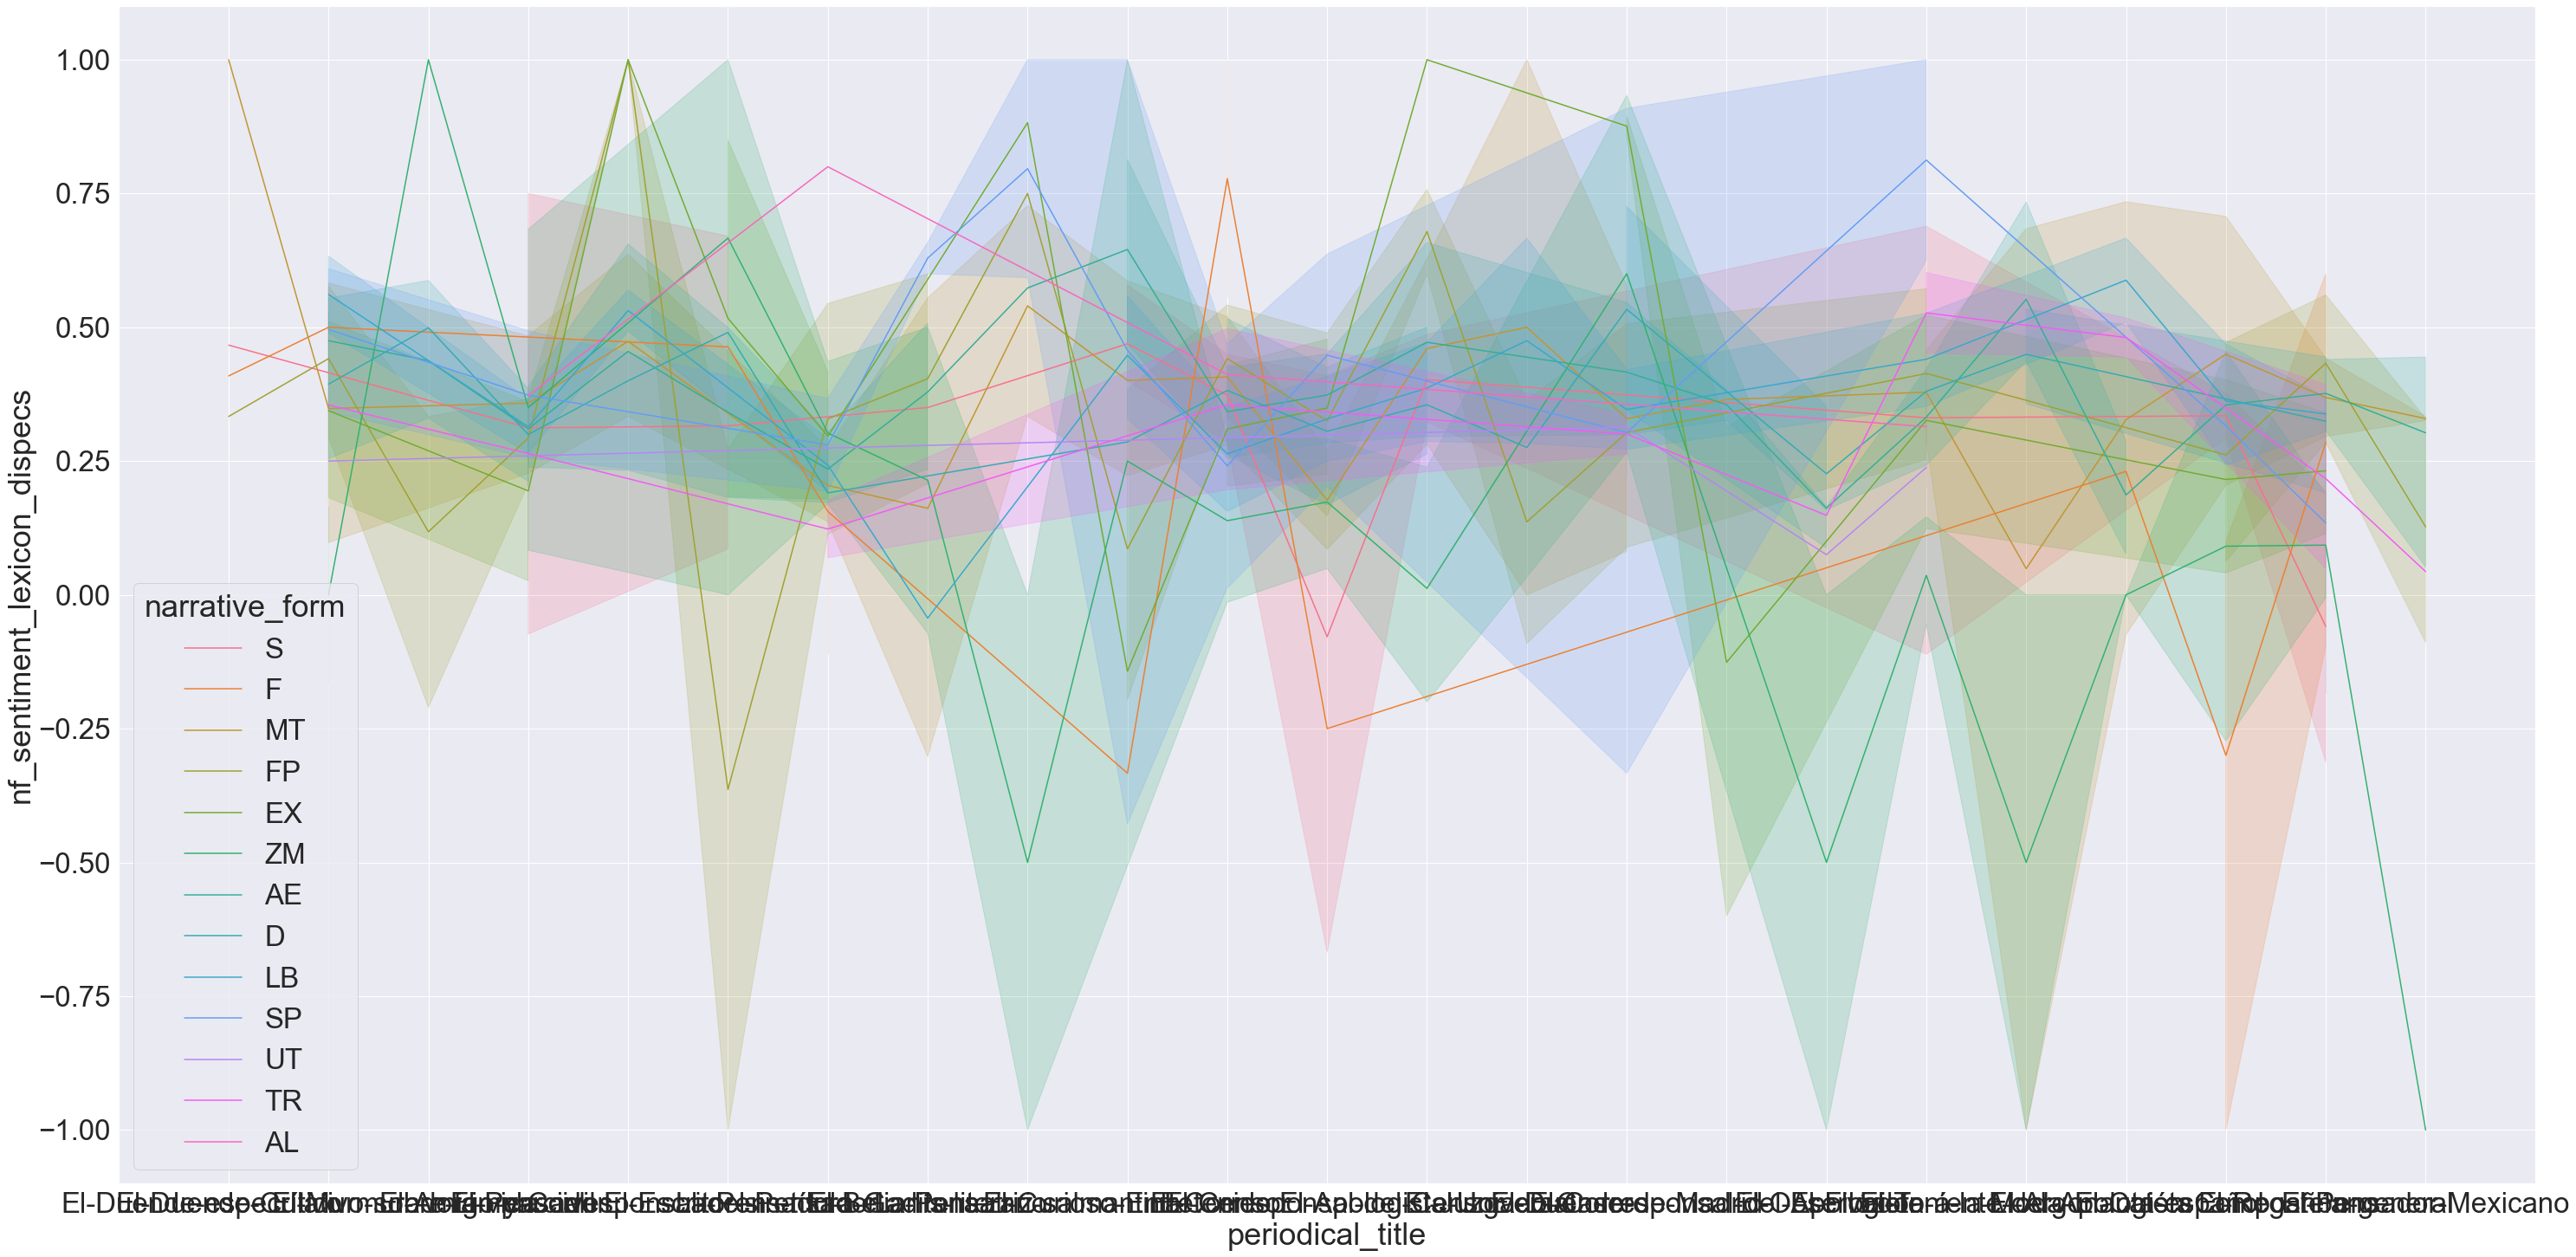

In [81]:
line = sns.lineplot(data=df, x=attribute, y="nf_sentiment_lexicon_dispecs", hue="narrative_form")
fig = line.get_figure()
fig.savefig("results/plots/spanish/manual_lexicon_lineplot.png")

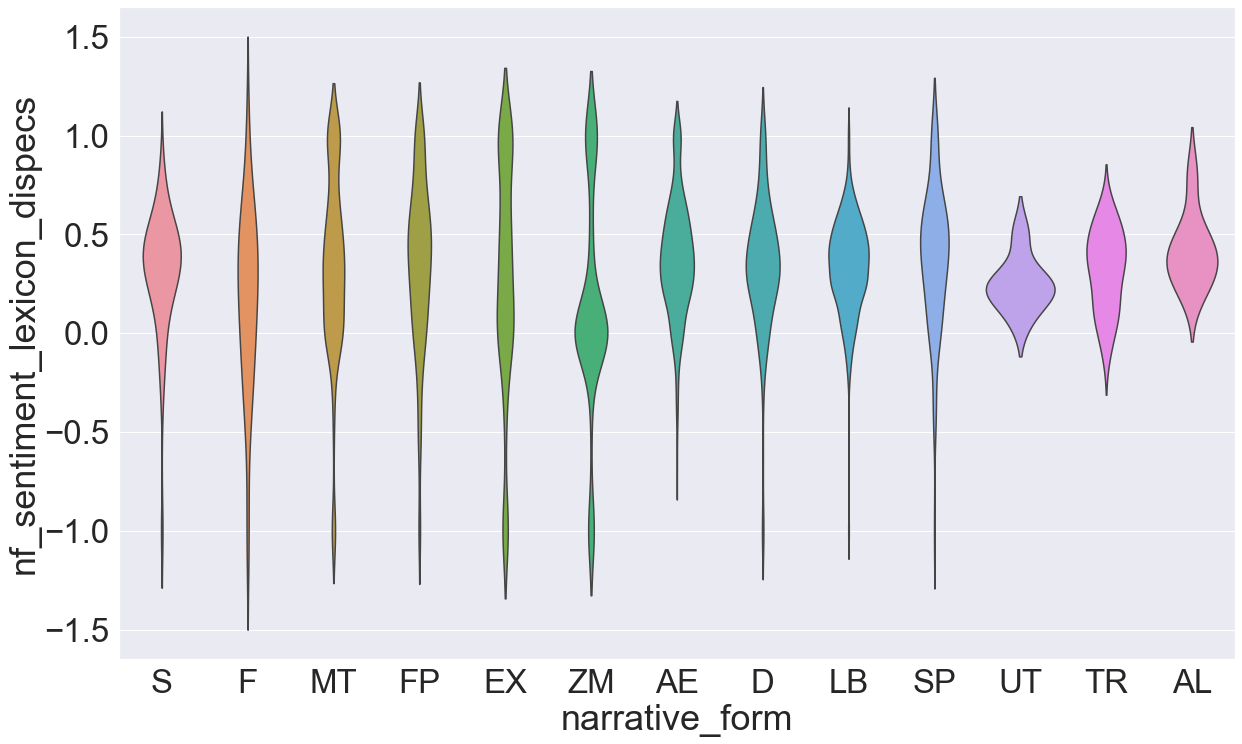

In [80]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20,12)


violin1 = sns.violinplot(x="narrative_form", y="nf_sentiment_lexicon_dispecs", kind="violin", inner=None, data=df, ax=ax)

fig = violin1.get_figure()
fig.savefig("results/plots/spanish/manual_lexicon_violin.png")



In [17]:
sent_score = []
for row in df['nf_sentiment_lexicon_dispecs']:
        if row == 0.000000 :    
            sent_score.append('NEU')
        elif row > 0.000000:  
            sent_score.append('POS')
        elif row < 0.000000:  
            sent_score.append('NEG')
        else:          
            sent_score.append('error')



In [18]:
df['lexicon_sent_score'] = sent_score


<AxesSubplot:xlabel='lexicon_sent_score', ylabel='Count'>

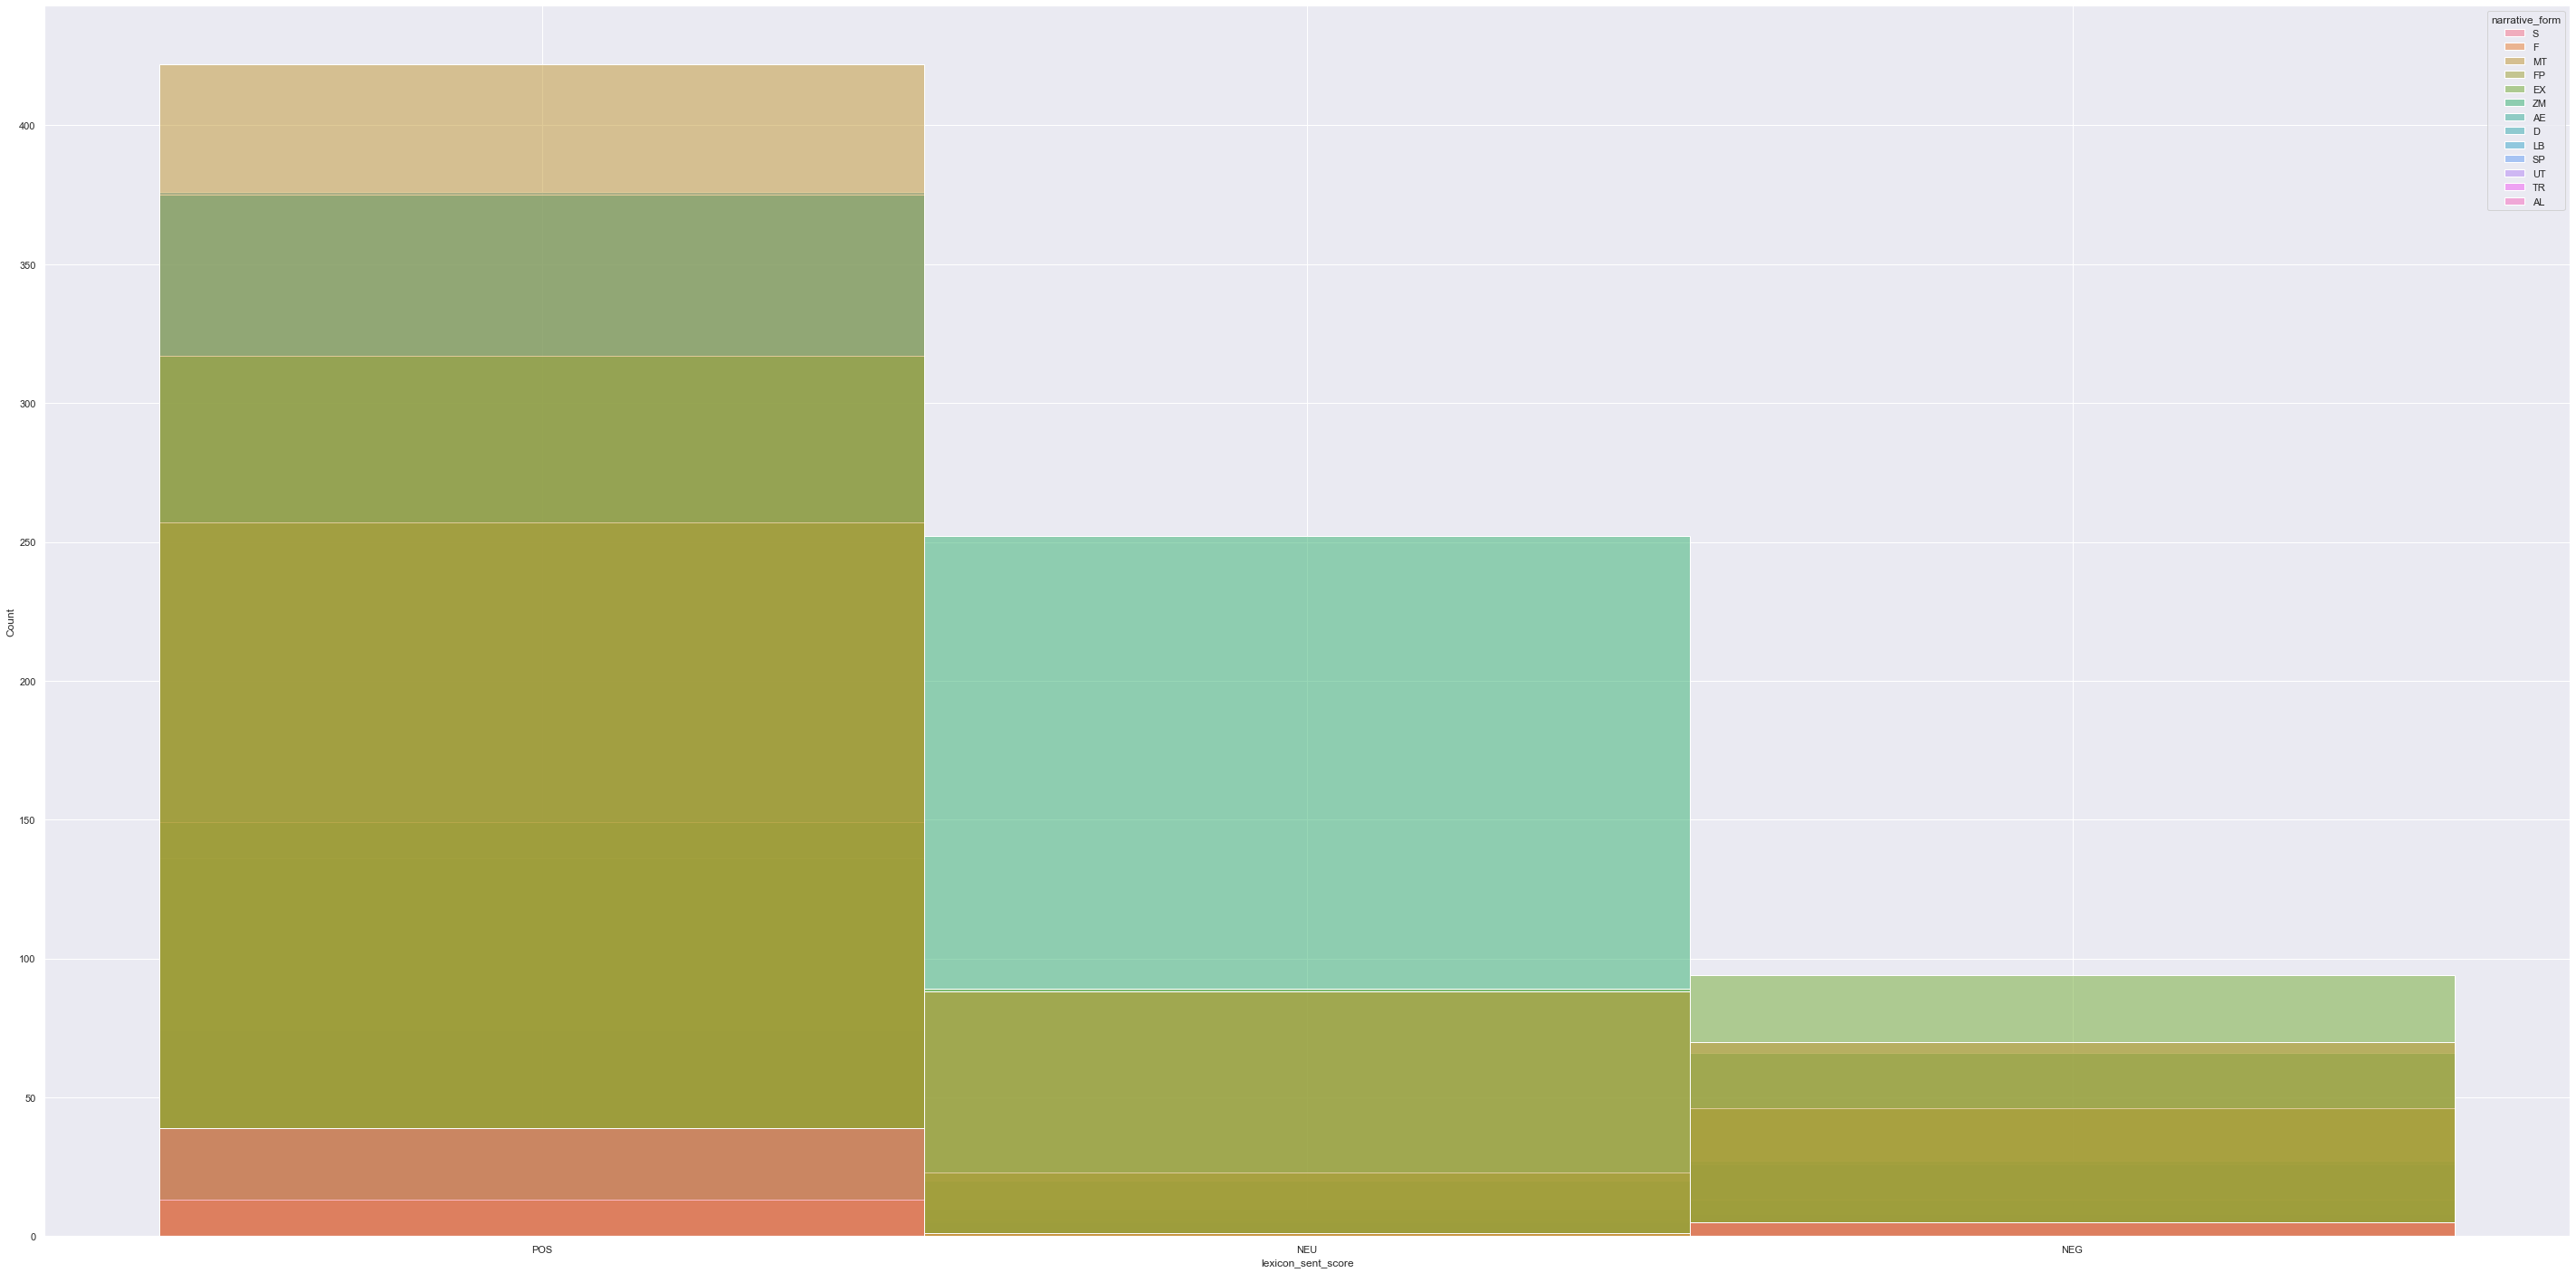

In [19]:
sns.histplot(data=df, x="lexicon_sent_score", hue="narrative_form",element="bars")


In [20]:
g = sns.catplot(x="periodical_title", kind="count", hue ="narrative_form", data=df)
g.fig.set_figwidth(700)
g.fig.set_figheight(100)


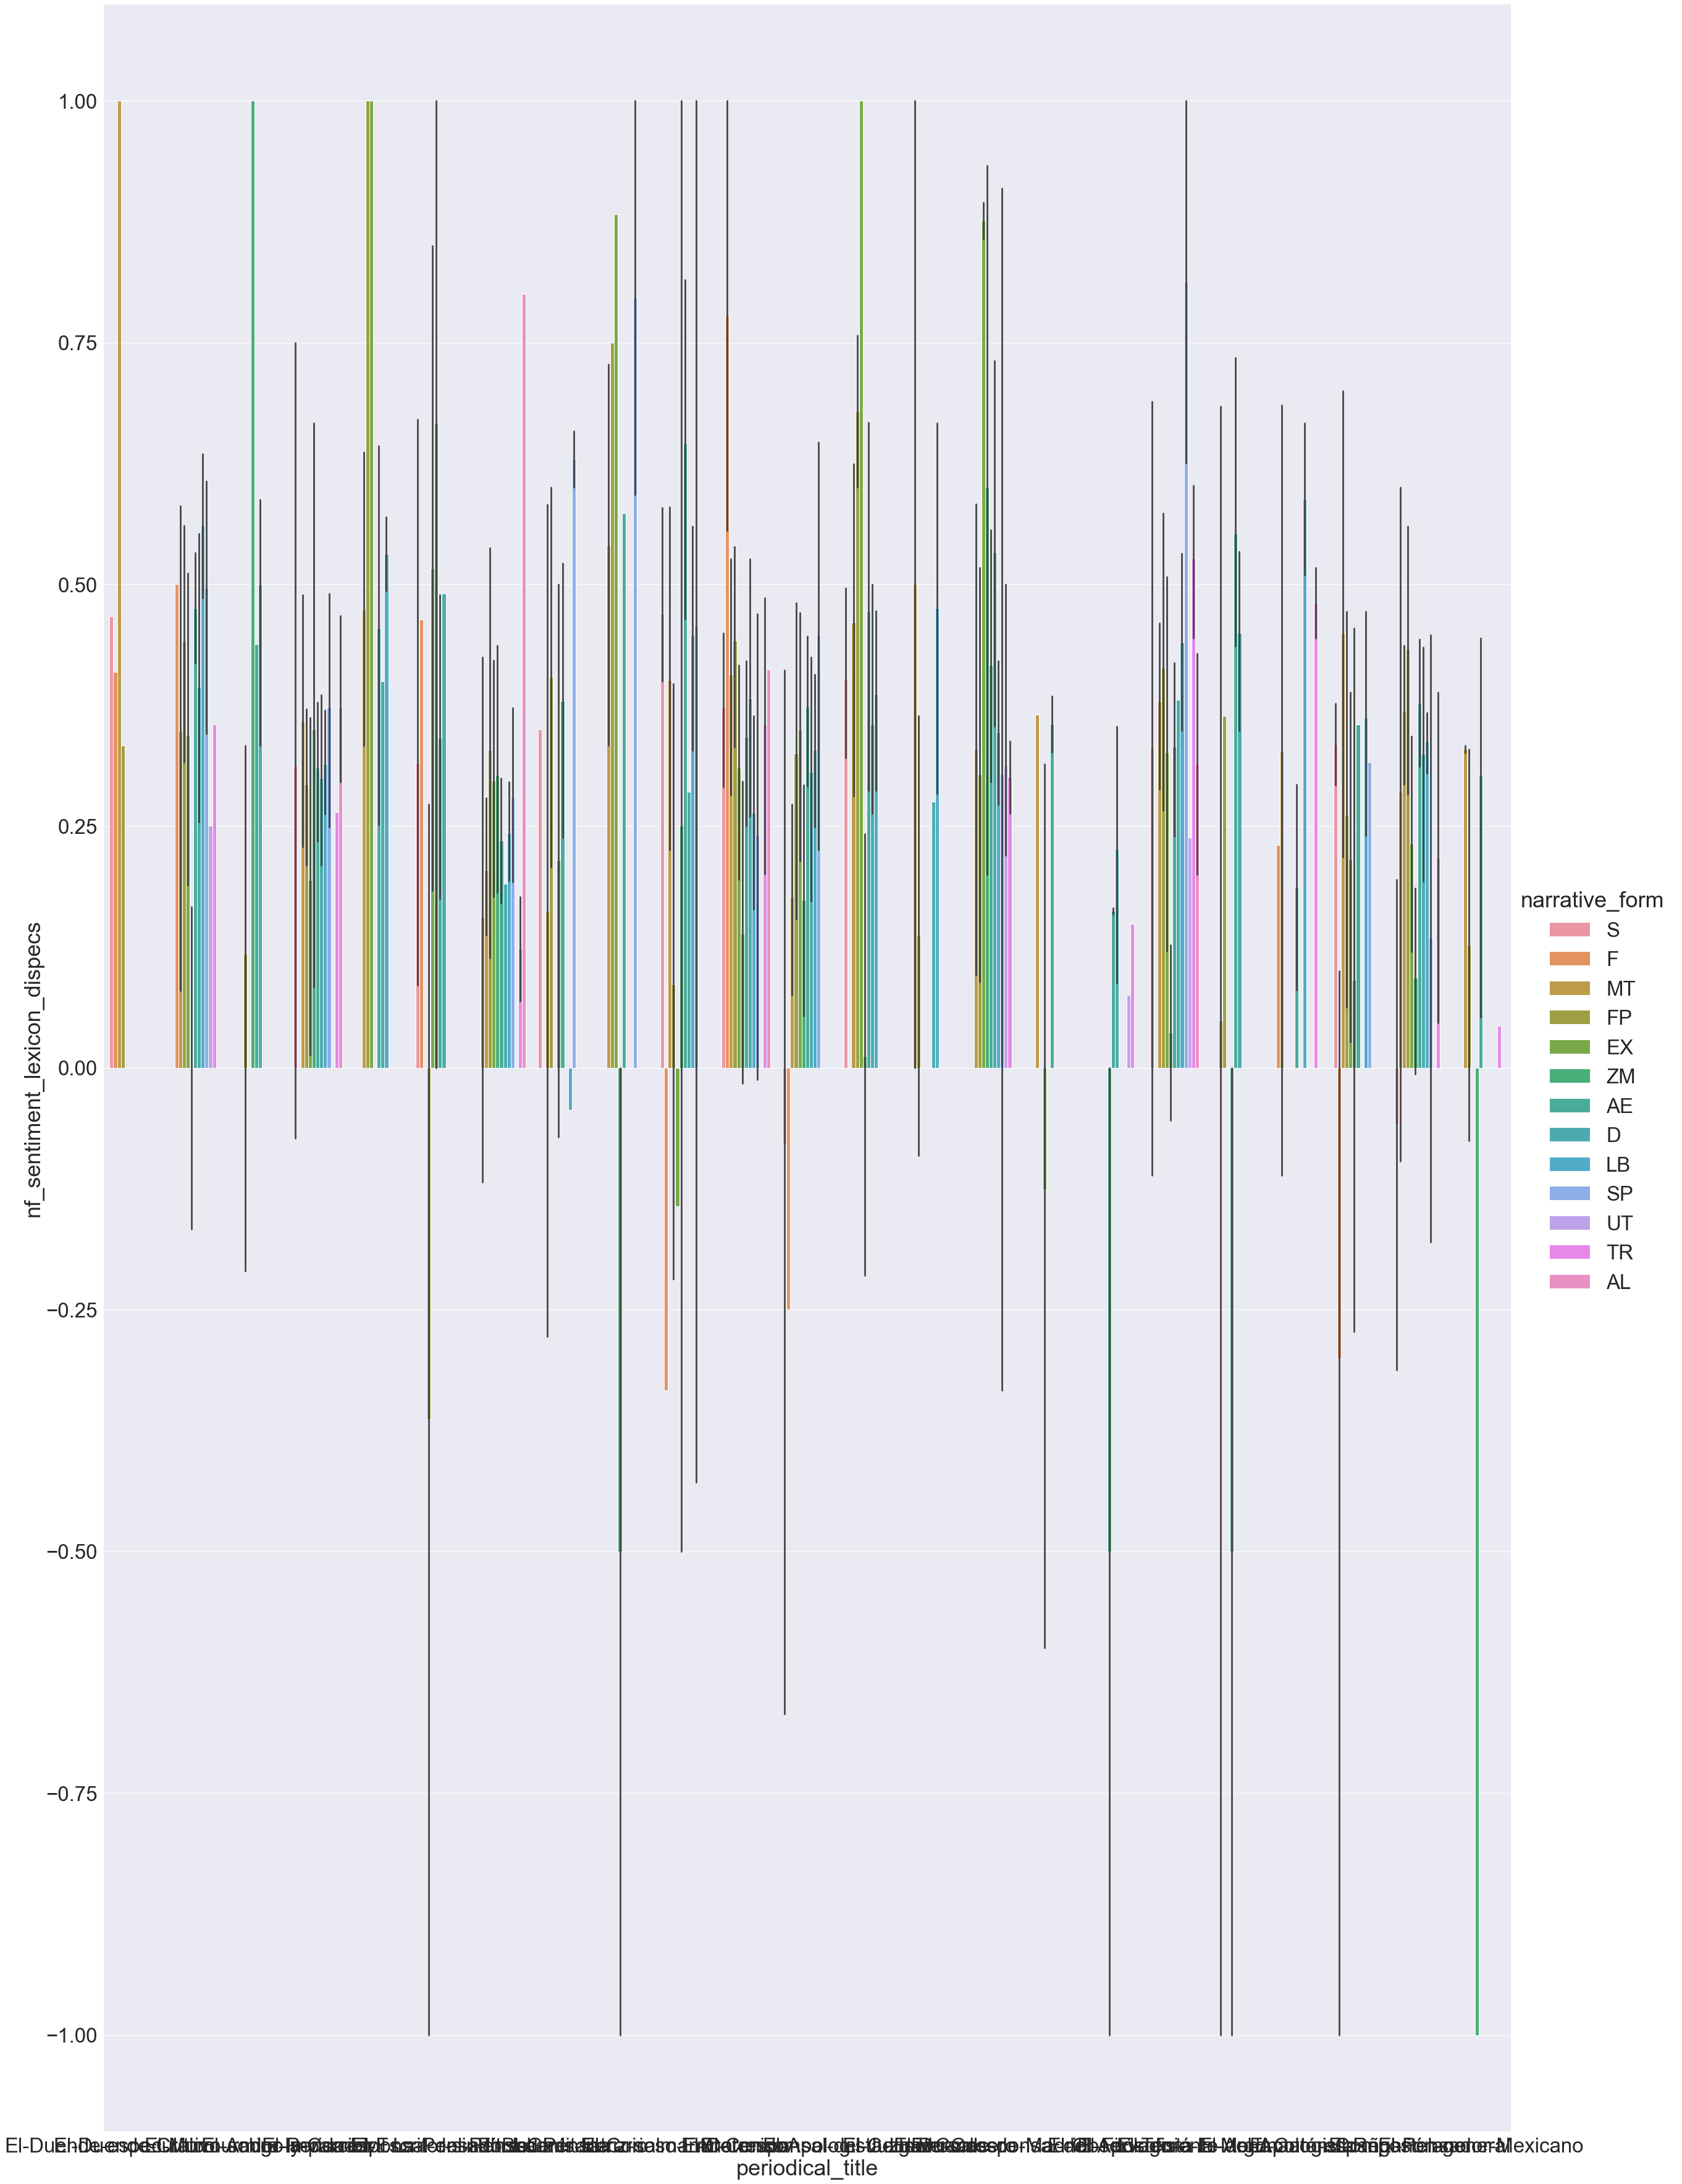

In [79]:


lexicon_sentiment_periodical = sns.catplot(x="periodical_title", y="nf_sentiment_lexicon_dispecs", hue="narrative_form", kind="bar", data=df, height = 50, aspect = 0.7)
fig = lexicon_sentiment_periodical.fig
fig.savefig("results/plots/spanish/lexicon_sentiment_periodical.png")

Computational lexicon

In [22]:
print((df.groupby('narrative_form')['nf_sentiment_lexicon_computational'].describe()))

                count      mean       std       min       25%       50%  \
narrative_form                                                            
AE              422.0  0.418865  0.288579 -0.666667  0.238571  0.415650   
AL                8.0  0.423505  0.204955  0.090909  0.354743  0.388303   
D               159.0  0.381961  0.326117 -1.000000  0.240669  0.369565   
EX              500.0  0.318849  0.580986 -1.000000  0.000000  0.333333   
F                19.0  0.222913  0.441438 -1.000000 -0.033333  0.230769   
FP              326.0  0.404072  0.412041 -1.000000  0.146617  0.435216   
LB              408.0  0.379599  0.210823 -0.200000  0.253565  0.386104   
MT              580.0  0.361224  0.469775 -1.000000  0.000000  0.343345   
S                44.0  0.337763  0.305279 -1.000000  0.249188  0.403557   
SP               87.0  0.405698  0.347131 -1.000000  0.214314  0.437500   
TR               27.0  0.369319  0.200477 -0.100000  0.235540  0.397436   
UT                6.0  0.

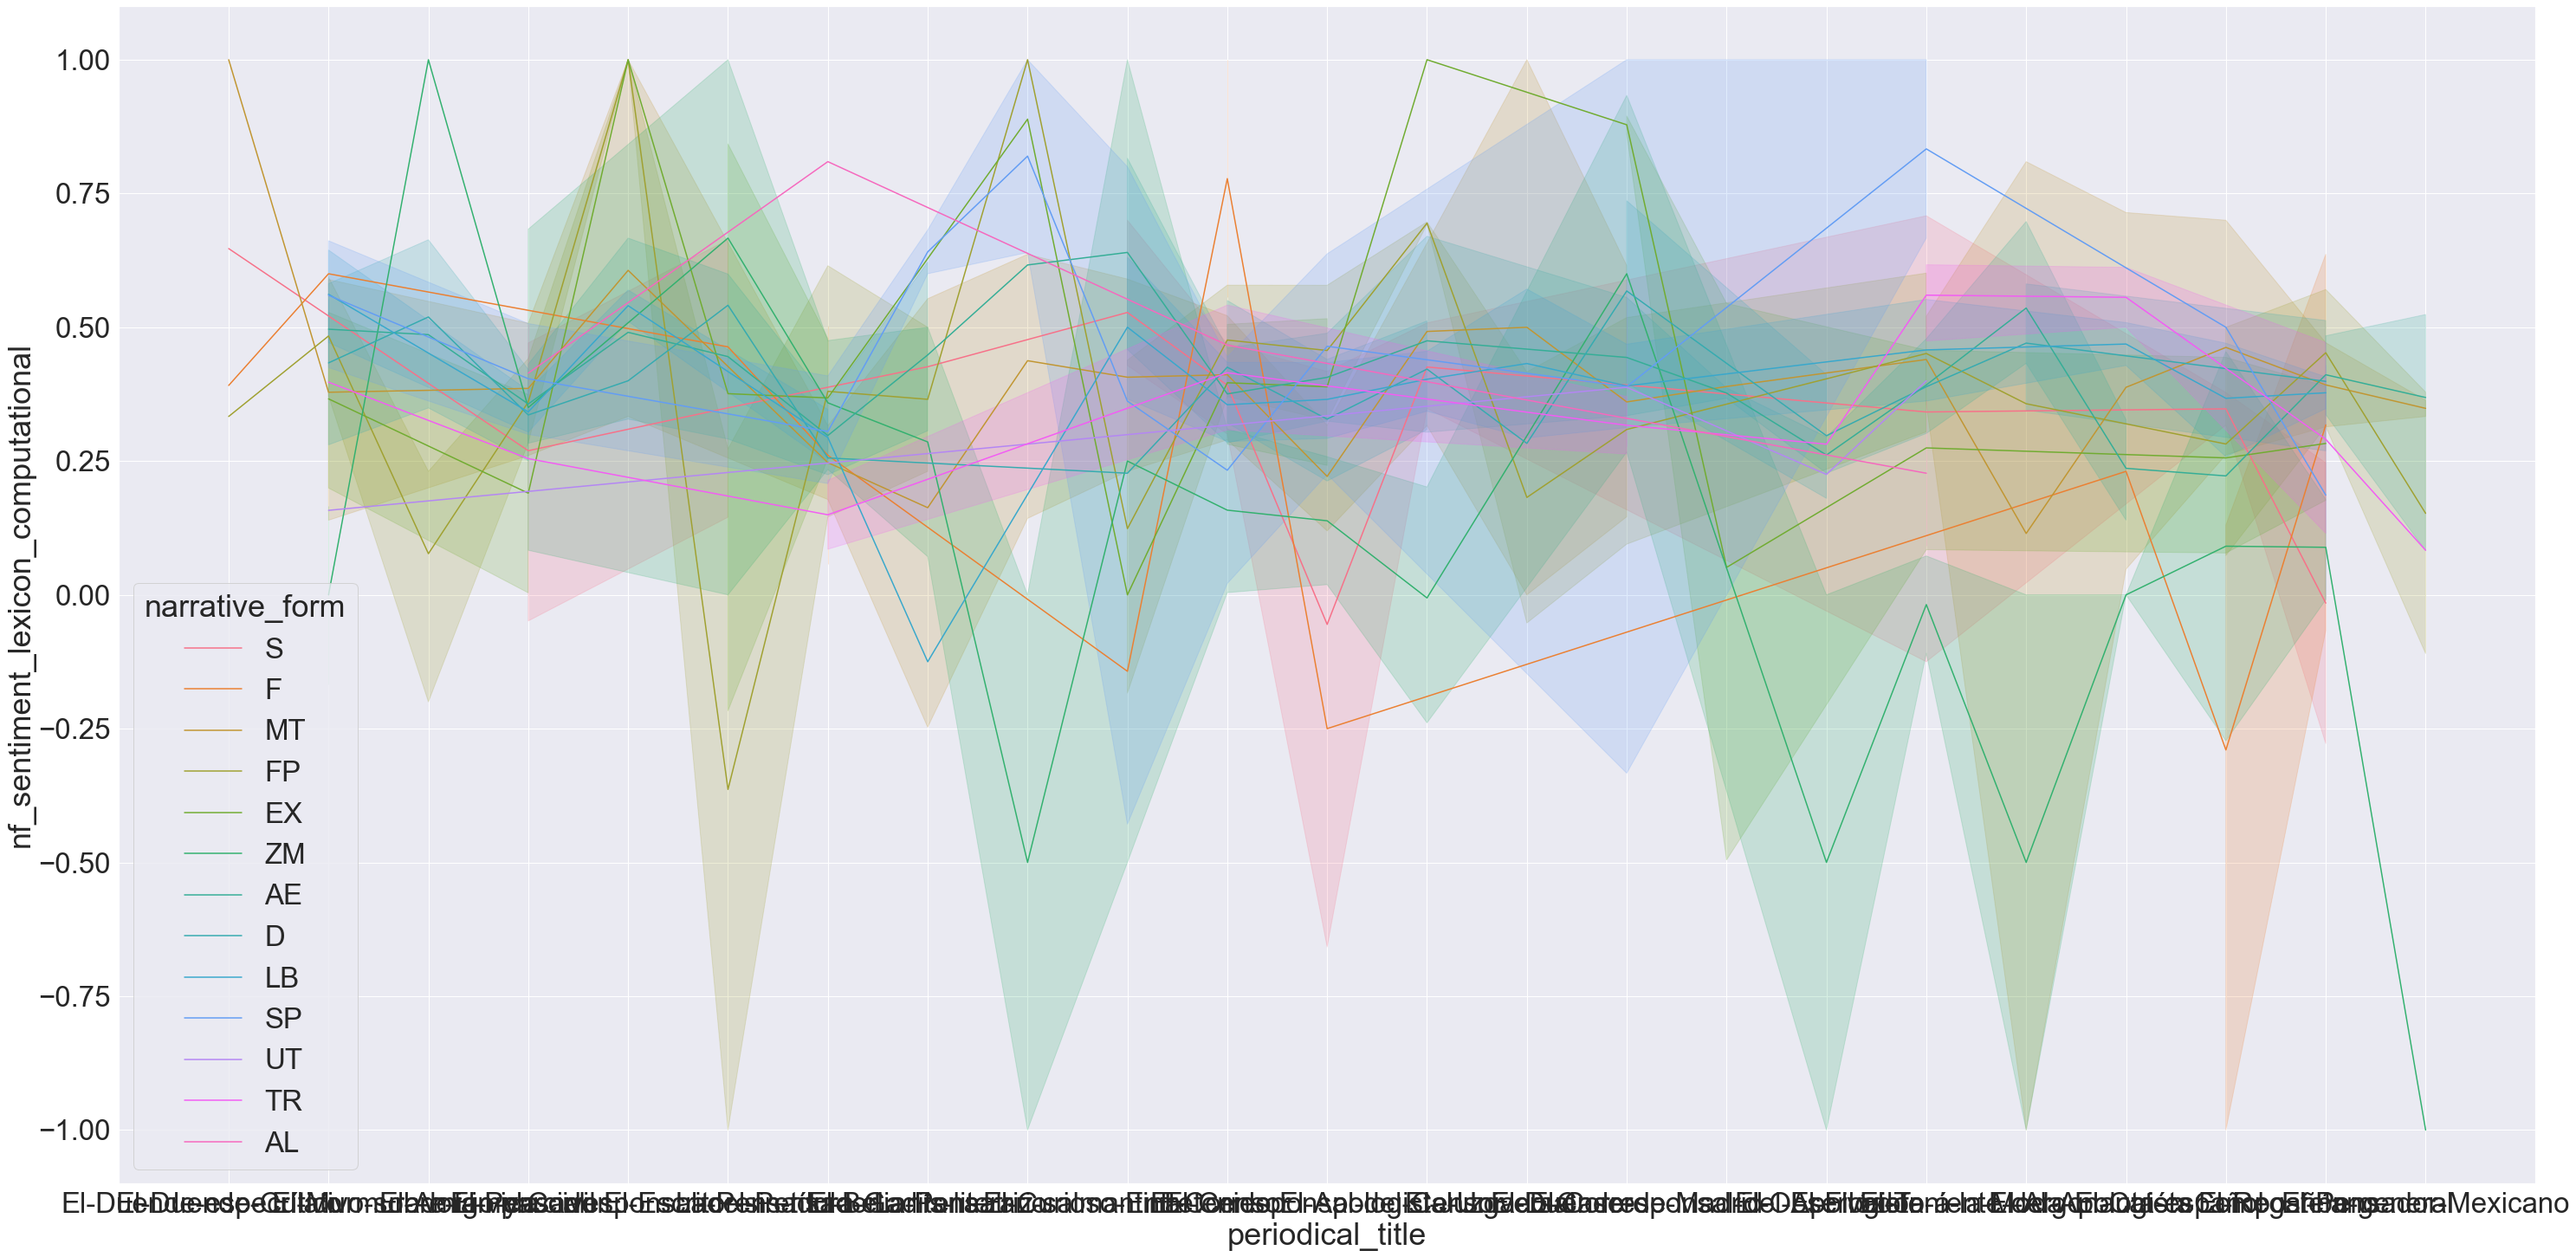

In [78]:
line1= sns.lineplot(data=df, x=attribute, y="nf_sentiment_lexicon_computational", hue="narrative_form")
fig = line1.get_figure()
fig.savefig("results/plots/spanish/computational_lexicon_lineplot.png")

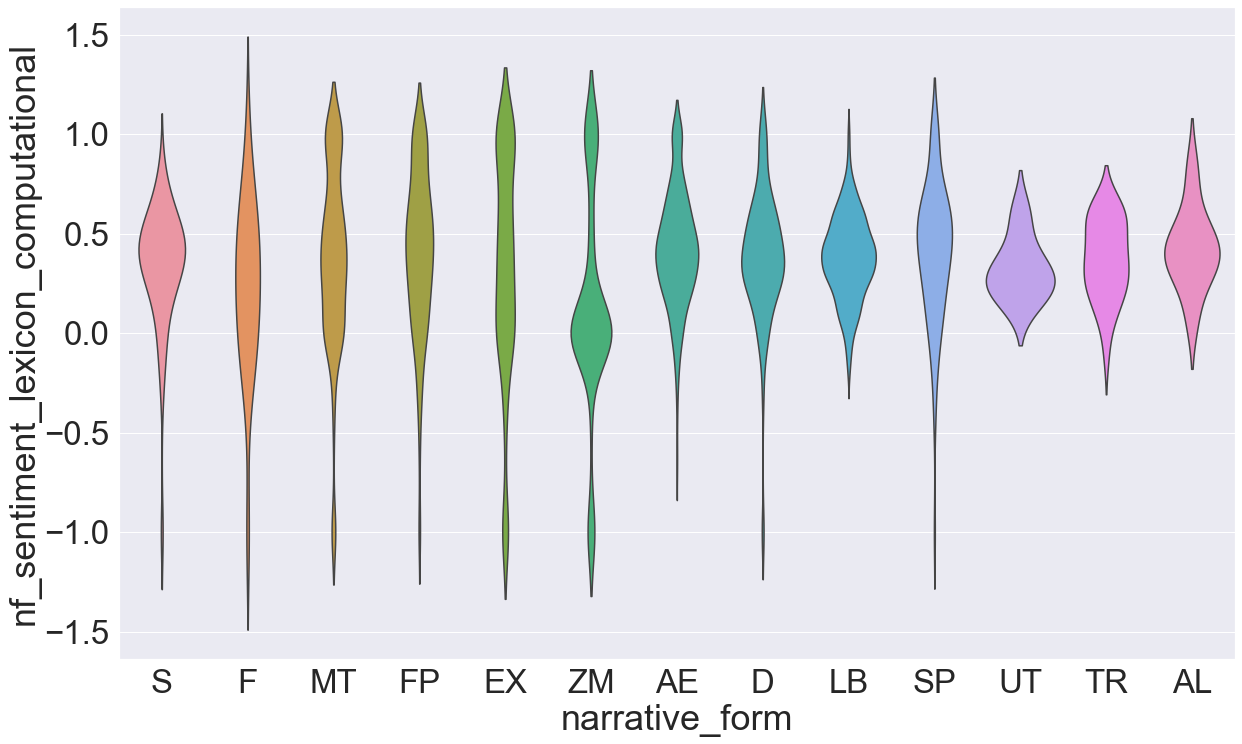

In [77]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20,12)


violin2 = sns.violinplot(x="narrative_form", y="nf_sentiment_lexicon_computational", kind="violin", inner=None, data=df, ax=ax)
fig = violin2.get_figure()
fig.savefig("results/plots/spanish/computational_lexicon_violin.png")

In [25]:
sent_score_comp = []
for row in df['nf_sentiment_lexicon_computational']:
        if row == 0.000000 :    
            sent_score_comp.append('NEU')
        elif row > 0.000000:  
            sent_score_comp.append('POS')
        elif row < 0.000000:  
            sent_score_comp.append('NEG')
        else:          
            sent_score_comp.append('error')



In [26]:
df['lexicon_sent_score_comp'] = sent_score_comp


In [27]:
df

issue_pid  \
filename                                                            
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...  o:mws-112-823   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...  o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...  o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...  o:mws-112-841   
1761-06-09_El-Duende-especulativo-sobre-la-vida...  o:mws-093-235   
...                                                           ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...     o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...     o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...     o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...     o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...     o:mws.8083   

                                                   narrative_form  xmlid  \
filename                                                                   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...              S   FR.3   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...              F  FR.12   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...             MT  FR.13   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...             FP   FR.4   
1761-06-09_El-Duende-especulativo-sobre-la-vida...             EX  FR.10   
...                                                           ...    ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...             FP  FR.11   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...             AE   FR.3   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...             TR   FR.5   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...             FP   FR.7   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...             FP   FR.9   

                                                                              periodical_title  \
filename                                                                                         
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...                           El-Duende-Crítico   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...                           El-Duende-Crítico   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...                           El-Duende-Crítico   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...                           El-Duende-Crítico   
1761-06-09_El-Duende-especulativo-sobre-la-vida...  El-Duende-especulativo-sobre-la-vida-civil   
...                                                                                        ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...                        El-Pensador-Mexicano   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...                        El-Pensador-Mexicano   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...                        El-Pensador-Mexicano   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...                        El-Pensador-Mexicano   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...                        El-Pensador-Mexicano   

                                                                                               author  \
filename                                                                                                
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...                           Frai Manuel de San Josef   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...                           Frai Manuel de San Josef   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...                           Frai Manuel de San Josef   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-...                           Frai Manuel de San Josef   
1761-06-09_El-Duende-especulativo-sobre-la-vida...  Juan Antonio Mercadal [Francisco Mariano Nipho...   
...                                                                                               ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernánde...    

Corrected

In [28]:
print((df.groupby('narrative_form')['nf_sentiment_lexicon_corrected'].describe()))

                count      mean       std       min       25%       50%  \
narrative_form                                                            
AE              422.0  0.381009  0.293085 -0.666667  0.200000  0.360000   
AL                8.0  0.415476  0.184710  0.200000  0.291576  0.395244   
D               159.0  0.338300  0.336716 -1.000000  0.194595  0.333333   
EX              500.0  0.279728  0.592705 -1.000000  0.000000  0.333333   
F                19.0  0.171617  0.449663 -1.000000 -0.048387  0.230769   
FP              326.0  0.350025  0.427767 -1.000000  0.101596  0.393939   
LB              408.0  0.337584  0.237064 -1.000000  0.209060  0.362669   
MT              580.0  0.328124  0.473221 -1.000000  0.000000  0.333333   
S                44.0  0.311749  0.308573 -1.000000  0.222222  0.365182   
SP               87.0  0.378067  0.357134 -1.000000  0.175735  0.426415   
TR               27.0  0.316503  0.205221 -0.100000  0.157080  0.354839   
UT                6.0  0.

In [50]:
sns.set(font_scale=3)


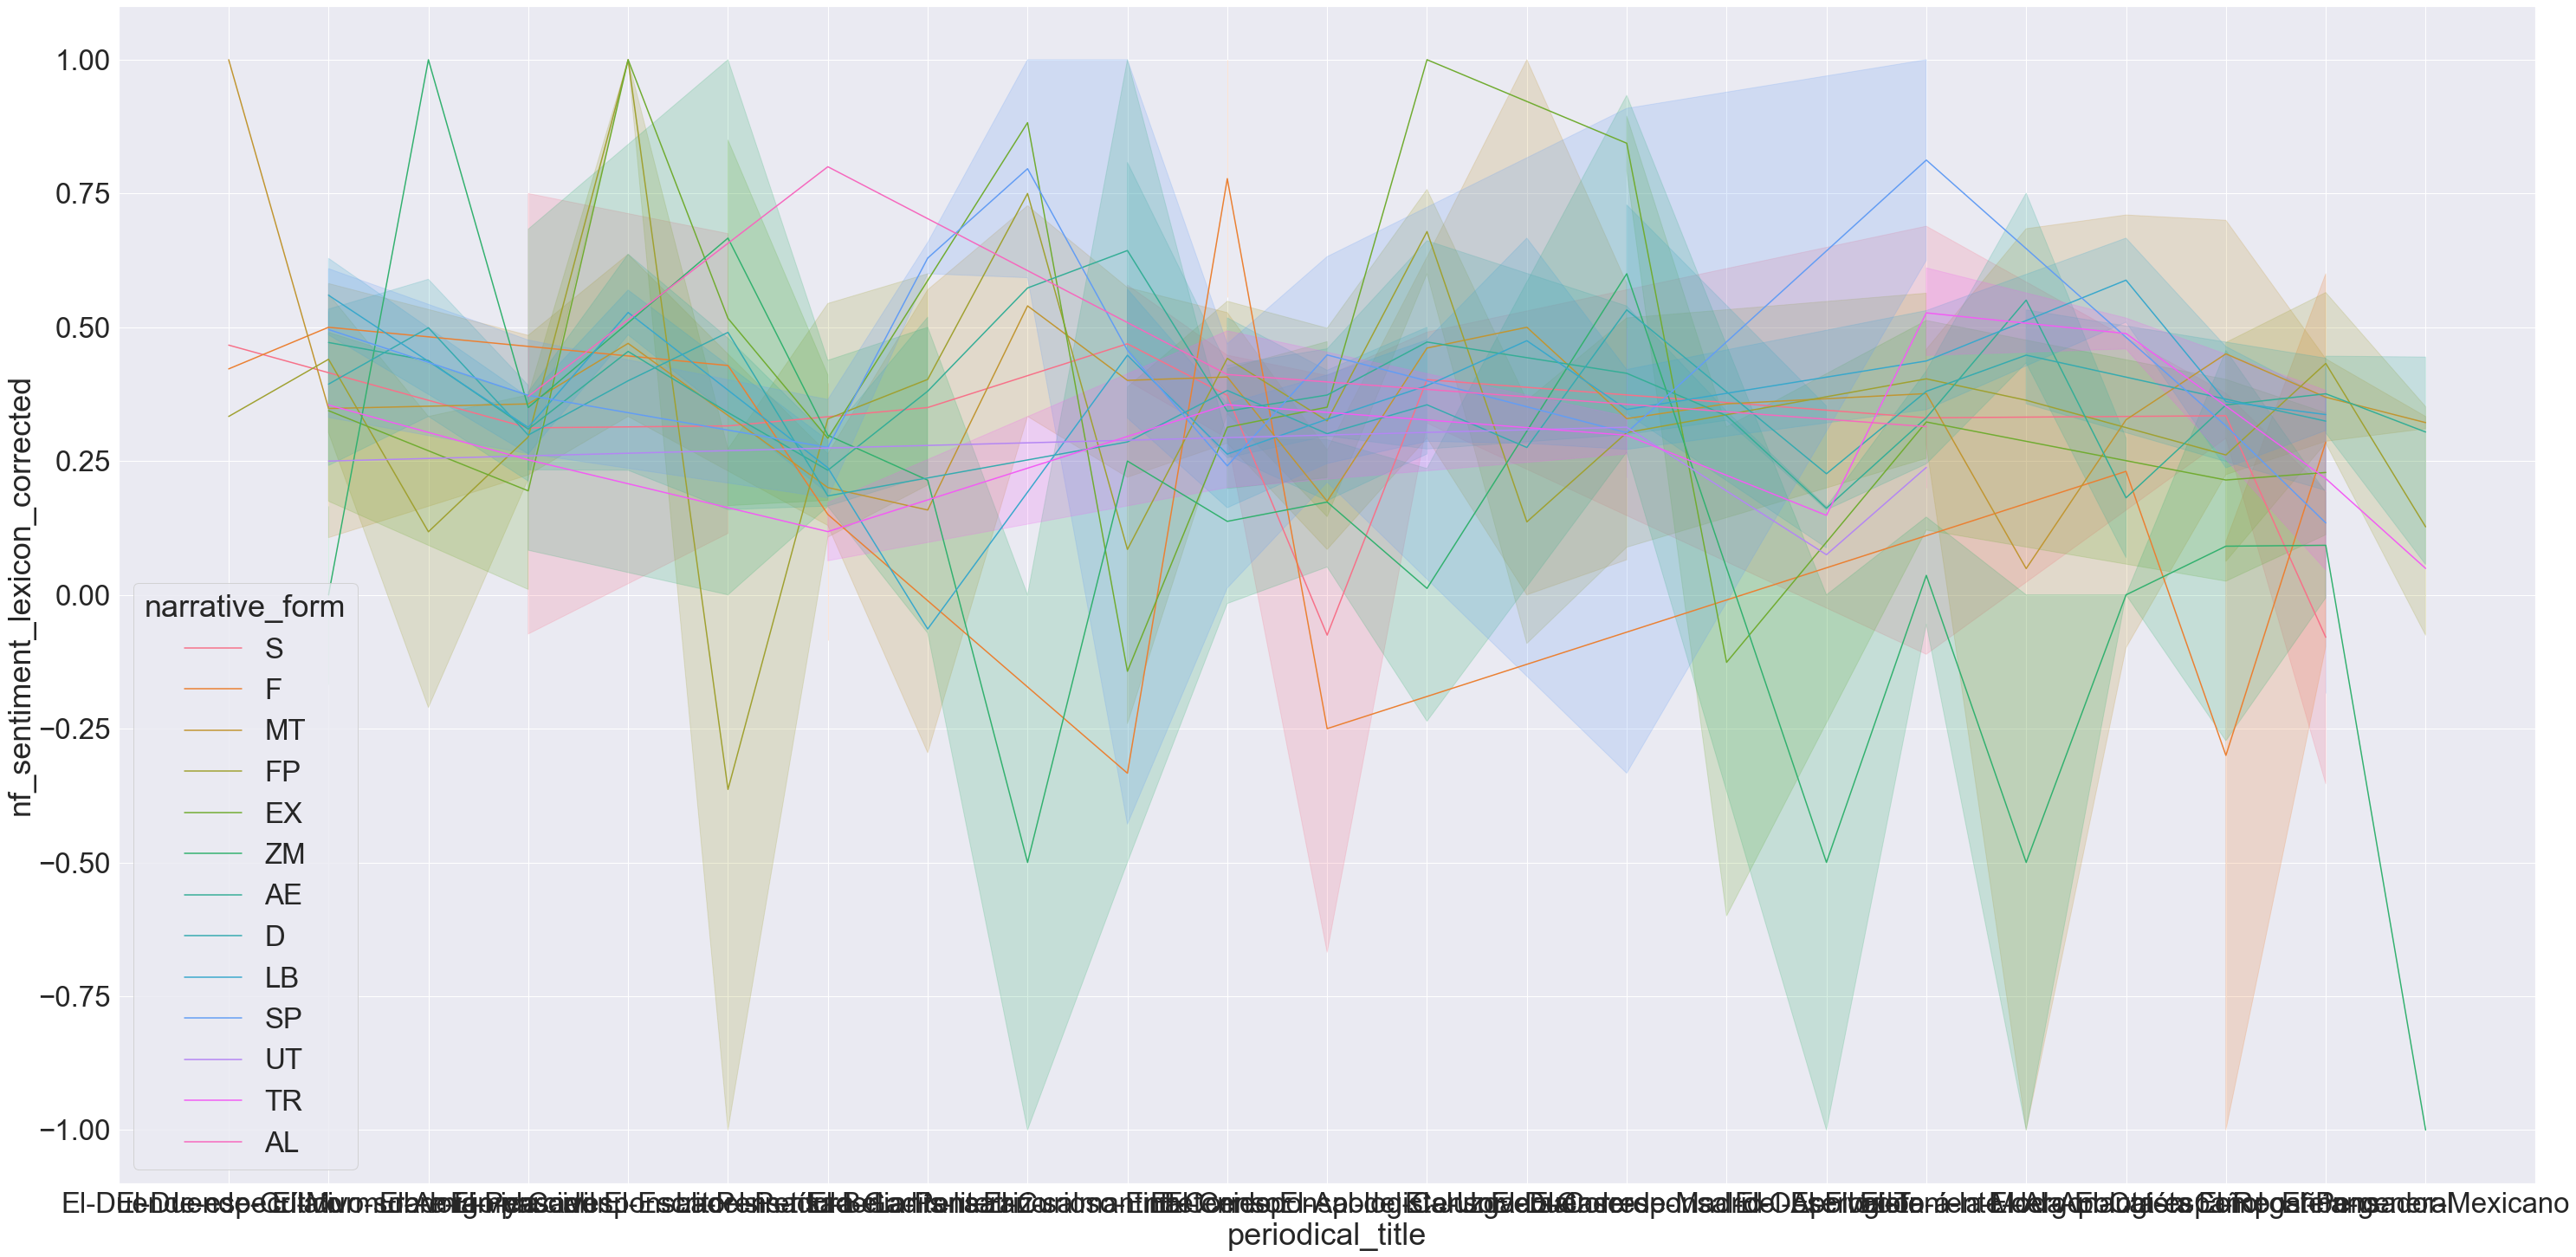

In [51]:
line2 = sns.lineplot(data=df, x=attribute, y="nf_sentiment_lexicon_corrected", hue="narrative_form")
fig = line2.get_figure()
fig.savefig("results/plots/spanish/corrected_lexicon_lineplot.png")

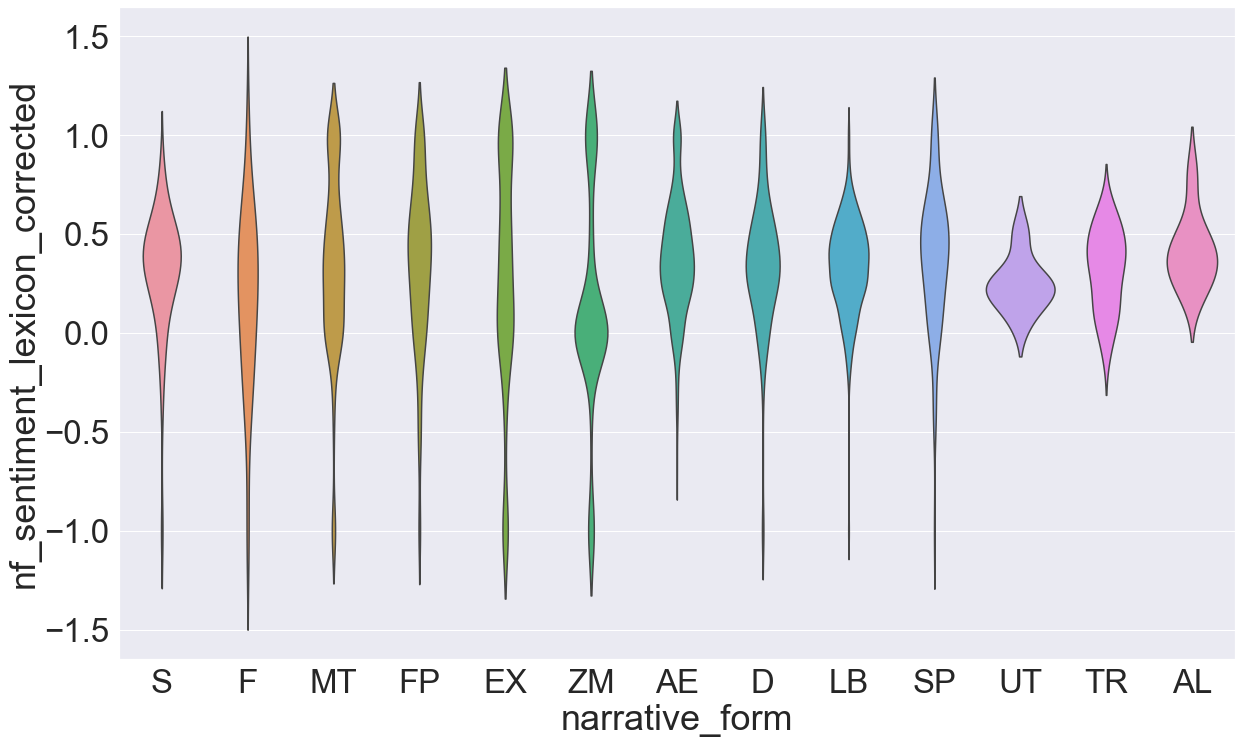

In [52]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20,12)


violin3 = sns.violinplot(x="narrative_form", y="nf_sentiment_lexicon_corrected", kind="violin", inner=None, data=df, ax=ax)
fig = violin3.get_figure()
fig.savefig("results/plots/spanish/corrected_lexicon_violin.png")

In [53]:
sent_score_corr = []
for row in df['nf_sentiment_lexicon_computational']:
        if row == 0.000000 :    
            sent_score_corr.append('NEU')
        elif row > 0.000000:  
            sent_score_corr.append('POS')
        elif row < 0.000000:  
            sent_score_corr.append('NEG')
        else:          
            sent_score_corr.append('error')

In [54]:
df['lexicon_sent_score_corr'] = sent_score_corr


In [55]:
df

issue_pid  \
filename                                                                                                                    
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                          o:mws-112-823   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                         o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                         o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                          o:mws-112-841   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt  o:mws-093-235   
...                                                                                                                   ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.11.txt                        o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.3.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.5.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.7.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.9.txt                         o:mws.8083   

                                                                                                           narrative_form  \
filename                                                                                                                    
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                                      S   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                                     F   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                                    MT   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                                     FP   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt             EX   
...                                                                                                                   ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.11.txt                                FP   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.3.txt                                 AE   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.5.txt                                 TR   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.7.txt                                 FP   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.9.txt                                 FP   

                                                                                                            xmlid  \
filename                                                                                                            
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                           FR.3   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                         FR.12   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                         FR.13   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                           FR.4   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt  FR.10   
...                                      

## Pysentimiento sentiment analysis

In [56]:
df['nf_sentiment_pysentimiento'] = df['nf_sentiment_pysentimiento'].astype('string')
df['nf_emotion_pysentimiento'] = df['nf_emotion_pysentimiento'].astype('string')

In [57]:
df.dtypes

issue_pid                              object
narrative_form                         object
xmlid                                  object
periodical_title                       object
author                                 object
year                                   object
issue_number                           object
text                                   string
nr_tokens                               int64
nf_sentiment_pysentimiento             string
nf_emotion_pysentimiento               string
nf_sentiment_lexicon_dispecs          float64
nf_sentiment_lexicon_computational    float64
nf_sentiment_lexicon_corrected        float64
nf_emotion_lexicon_SAL                 string
lexicon_emotion                        object
lexicon_sent_score                     object
lexicon_sent_score_comp                object
lexicon_sent_score_corr                object
sentiment_py                           string
emotion_py                             string
dtype: object

In [58]:
df['nf_sentiment_pysentimiento'] = df['nf_sentiment_pysentimiento'].astype('string')
df['nf_emotion_pysentimiento'] = df['nf_emotion_pysentimiento'].astype('string')
df.dtypes

issue_pid                              object
narrative_form                         object
xmlid                                  object
periodical_title                       object
author                                 object
year                                   object
issue_number                           object
text                                   string
nr_tokens                               int64
nf_sentiment_pysentimiento             string
nf_emotion_pysentimiento               string
nf_sentiment_lexicon_dispecs          float64
nf_sentiment_lexicon_computational    float64
nf_sentiment_lexicon_corrected        float64
nf_emotion_lexicon_SAL                 string
lexicon_emotion                        object
lexicon_sent_score                     object
lexicon_sent_score_comp                object
lexicon_sent_score_corr                object
sentiment_py                           string
emotion_py                             string
dtype: object

In [59]:
df['sentiment_py'] = df['nf_sentiment_pysentimiento'].str.findall(r'\=([^,]+)\, probas')
df['emotion_py'] = df['nf_emotion_pysentimiento'].str.findall(r'\=([^,]+)\, probas')


In [60]:
pd.set_option('display.max_colwidth', None)

df.dtypes

issue_pid                              object
narrative_form                         object
xmlid                                  object
periodical_title                       object
author                                 object
year                                   object
issue_number                           object
text                                   string
nr_tokens                               int64
nf_sentiment_pysentimiento             string
nf_emotion_pysentimiento               string
nf_sentiment_lexicon_dispecs          float64
nf_sentiment_lexicon_computational    float64
nf_sentiment_lexicon_corrected        float64
nf_emotion_lexicon_SAL                 string
lexicon_emotion                        object
lexicon_sent_score                     object
lexicon_sent_score_comp                object
lexicon_sent_score_corr                object
sentiment_py                           object
emotion_py                             object
dtype: object

In [61]:
df['sentiment_py'] = df['sentiment_py'].astype('string')
df['emotion_py'] = df['emotion_py'].astype('string')
df.dtypes

issue_pid                              object
narrative_form                         object
xmlid                                  object
periodical_title                       object
author                                 object
year                                   object
issue_number                           object
text                                   string
nr_tokens                               int64
nf_sentiment_pysentimiento             string
nf_emotion_pysentimiento               string
nf_sentiment_lexicon_dispecs          float64
nf_sentiment_lexicon_computational    float64
nf_sentiment_lexicon_corrected        float64
nf_emotion_lexicon_SAL                 string
lexicon_emotion                        object
lexicon_sent_score                     object
lexicon_sent_score_comp                object
lexicon_sent_score_corr                object
sentiment_py                           string
emotion_py                             string
dtype: object

In [62]:
df

issue_pid  \
filename                                                                                                                    
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                          o:mws-112-823   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                         o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                         o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                          o:mws-112-841   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt  o:mws-093-235   
...                                                                                                                   ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.11.txt                        o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.3.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.5.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.7.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.9.txt                         o:mws.8083   

                                                                                                           narrative_form  \
filename                                                                                                                    
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                                      S   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                                     F   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                                    MT   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                                     FP   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt             EX   
...                                                                                                                   ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.11.txt                                FP   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.3.txt                                 AE   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.5.txt                                 TR   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.7.txt                                 FP   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.9.txt                                 FP   

                                                                                                            xmlid  \
filename                                                                                                            
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                           FR.3   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                         FR.12   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                         FR.13   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                           FR.4   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt  FR.10   
...                                      

In [63]:
df['sentiment_py'] = df['sentiment_py'].str.replace('[', '')
df['sentiment_py'] = df['sentiment_py'].str.replace(']', '')
df['sentiment_py'] = df['sentiment_py'].str.replace("'", "")
df['emotion_py'] = df['emotion_py'].str.replace('[', '')
df['emotion_py'] = df['emotion_py'].str.replace(']', '')
df['emotion_py'] = df['emotion_py'].str.replace("'", "")

C:\Users\krusic\AppData\Local\Temp/ipykernel_13400/3096209067.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sentiment_py'] = df['sentiment_py'].str.replace('[', '')
C:\Users\krusic\AppData\Local\Temp/ipykernel_13400/3096209067.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sentiment_py'] = df['sentiment_py'].str.replace(']', '')
C:\Users\krusic\AppData\Local\Temp/ipykernel_13400/3096209067.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['emotion_py'] = df['emotion_py'].str.replace('[', '')
C:\Us

In [64]:
df

issue_pid  \
filename                                                                                                                    
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                          o:mws-112-823   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                         o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                         o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                          o:mws-112-841   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt  o:mws-093-235   
...                                                                                                                   ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.11.txt                        o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.3.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.5.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.7.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.9.txt                         o:mws.8083   

                                                                                                           narrative_form  \
filename                                                                                                                    
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                                      S   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                                     F   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                                    MT   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                                     FP   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt             EX   
...                                                                                                                   ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.11.txt                                FP   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.3.txt                                 AE   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.5.txt                                 TR   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.7.txt                                 FP   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.9.txt                                 FP   

                                                                                                            xmlid  \
filename                                                                                                            
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                           FR.3   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                         FR.12   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                         FR.13   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                           FR.4   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt  FR.10   
...                                      

In [65]:
df['nf_emotion_lexicon_SAL'] = df['nf_emotion_lexicon_SAL'].astype('string')


In [66]:
palette = {'POS':'green', 'NEU':'blue', 'NEG':'red'}


With tthe lexicon tool, we see that for all narrative forms, the most detected emotion is positive. Neutral words weren't found in satire , dreams and fables while neutral and negative words weren't found in utopic fiction and allegories. 

Corrected dictionary

In [67]:
sns.set(font_scale=3)


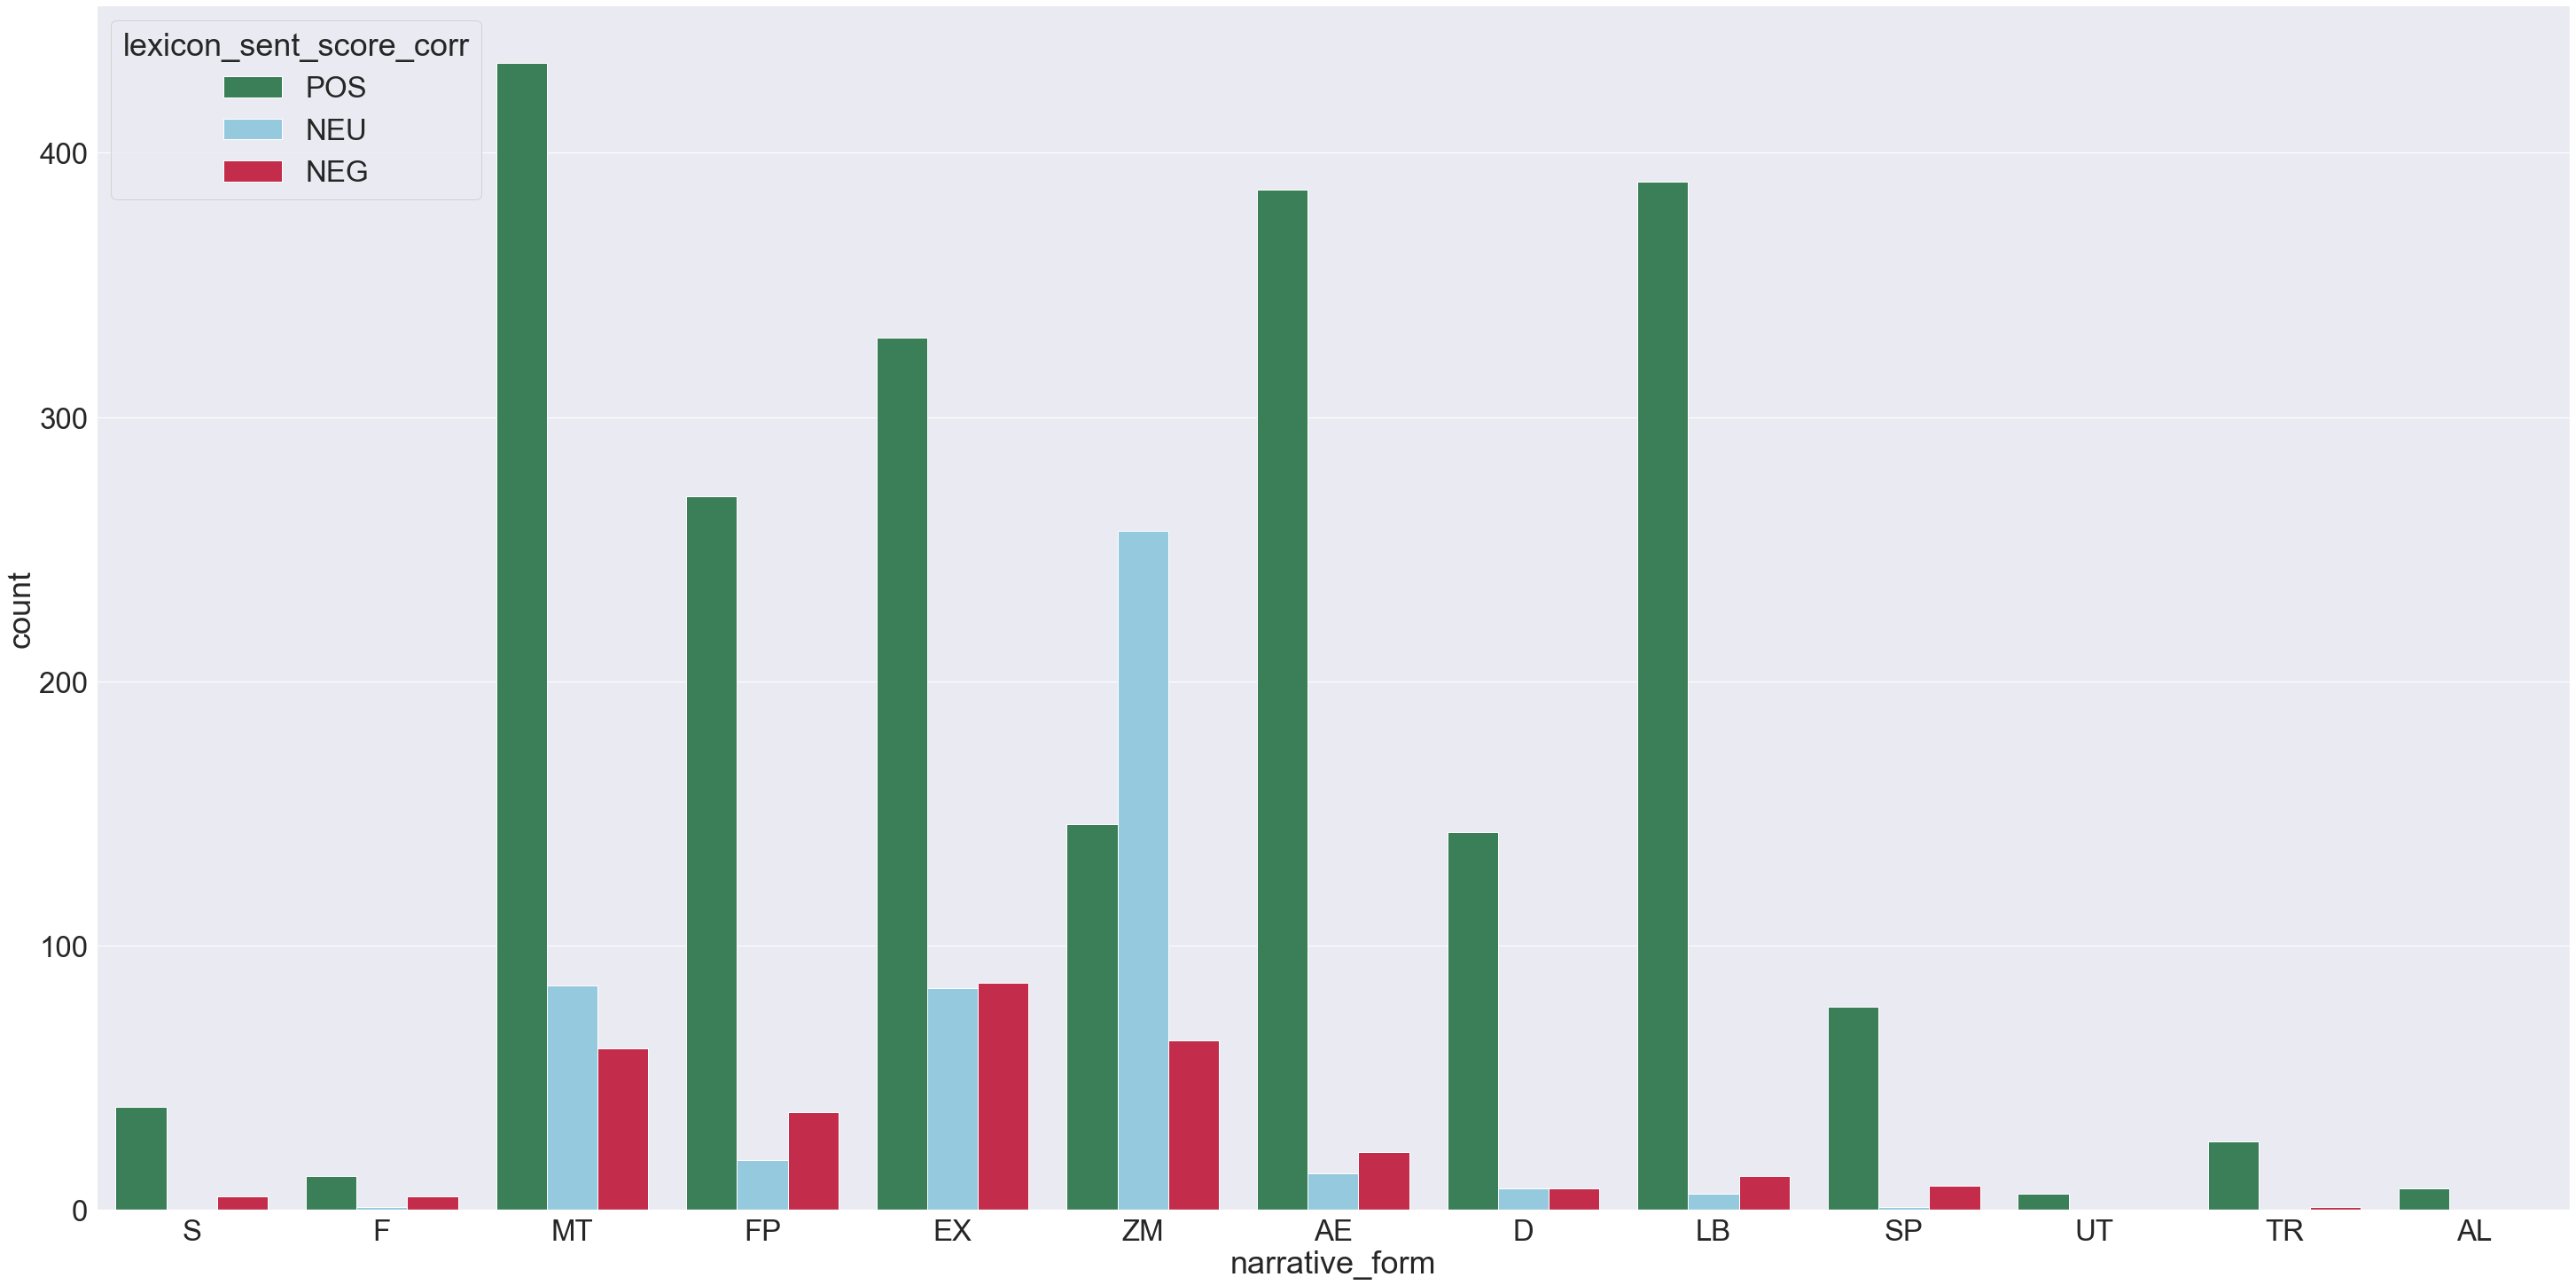

In [68]:
colors = {'POS':'seagreen', 'NEU':'skyblue', 'NEG':'crimson'}
sent_Score1 = sns.countplot(x=df['narrative_form'], palette=colors,hue=df['lexicon_sent_score_corr'])
fig = sent_Score1.get_figure()
fig.savefig("results/plots/spanish/lexicon_sent_score_corr.png")


Manual dictionary

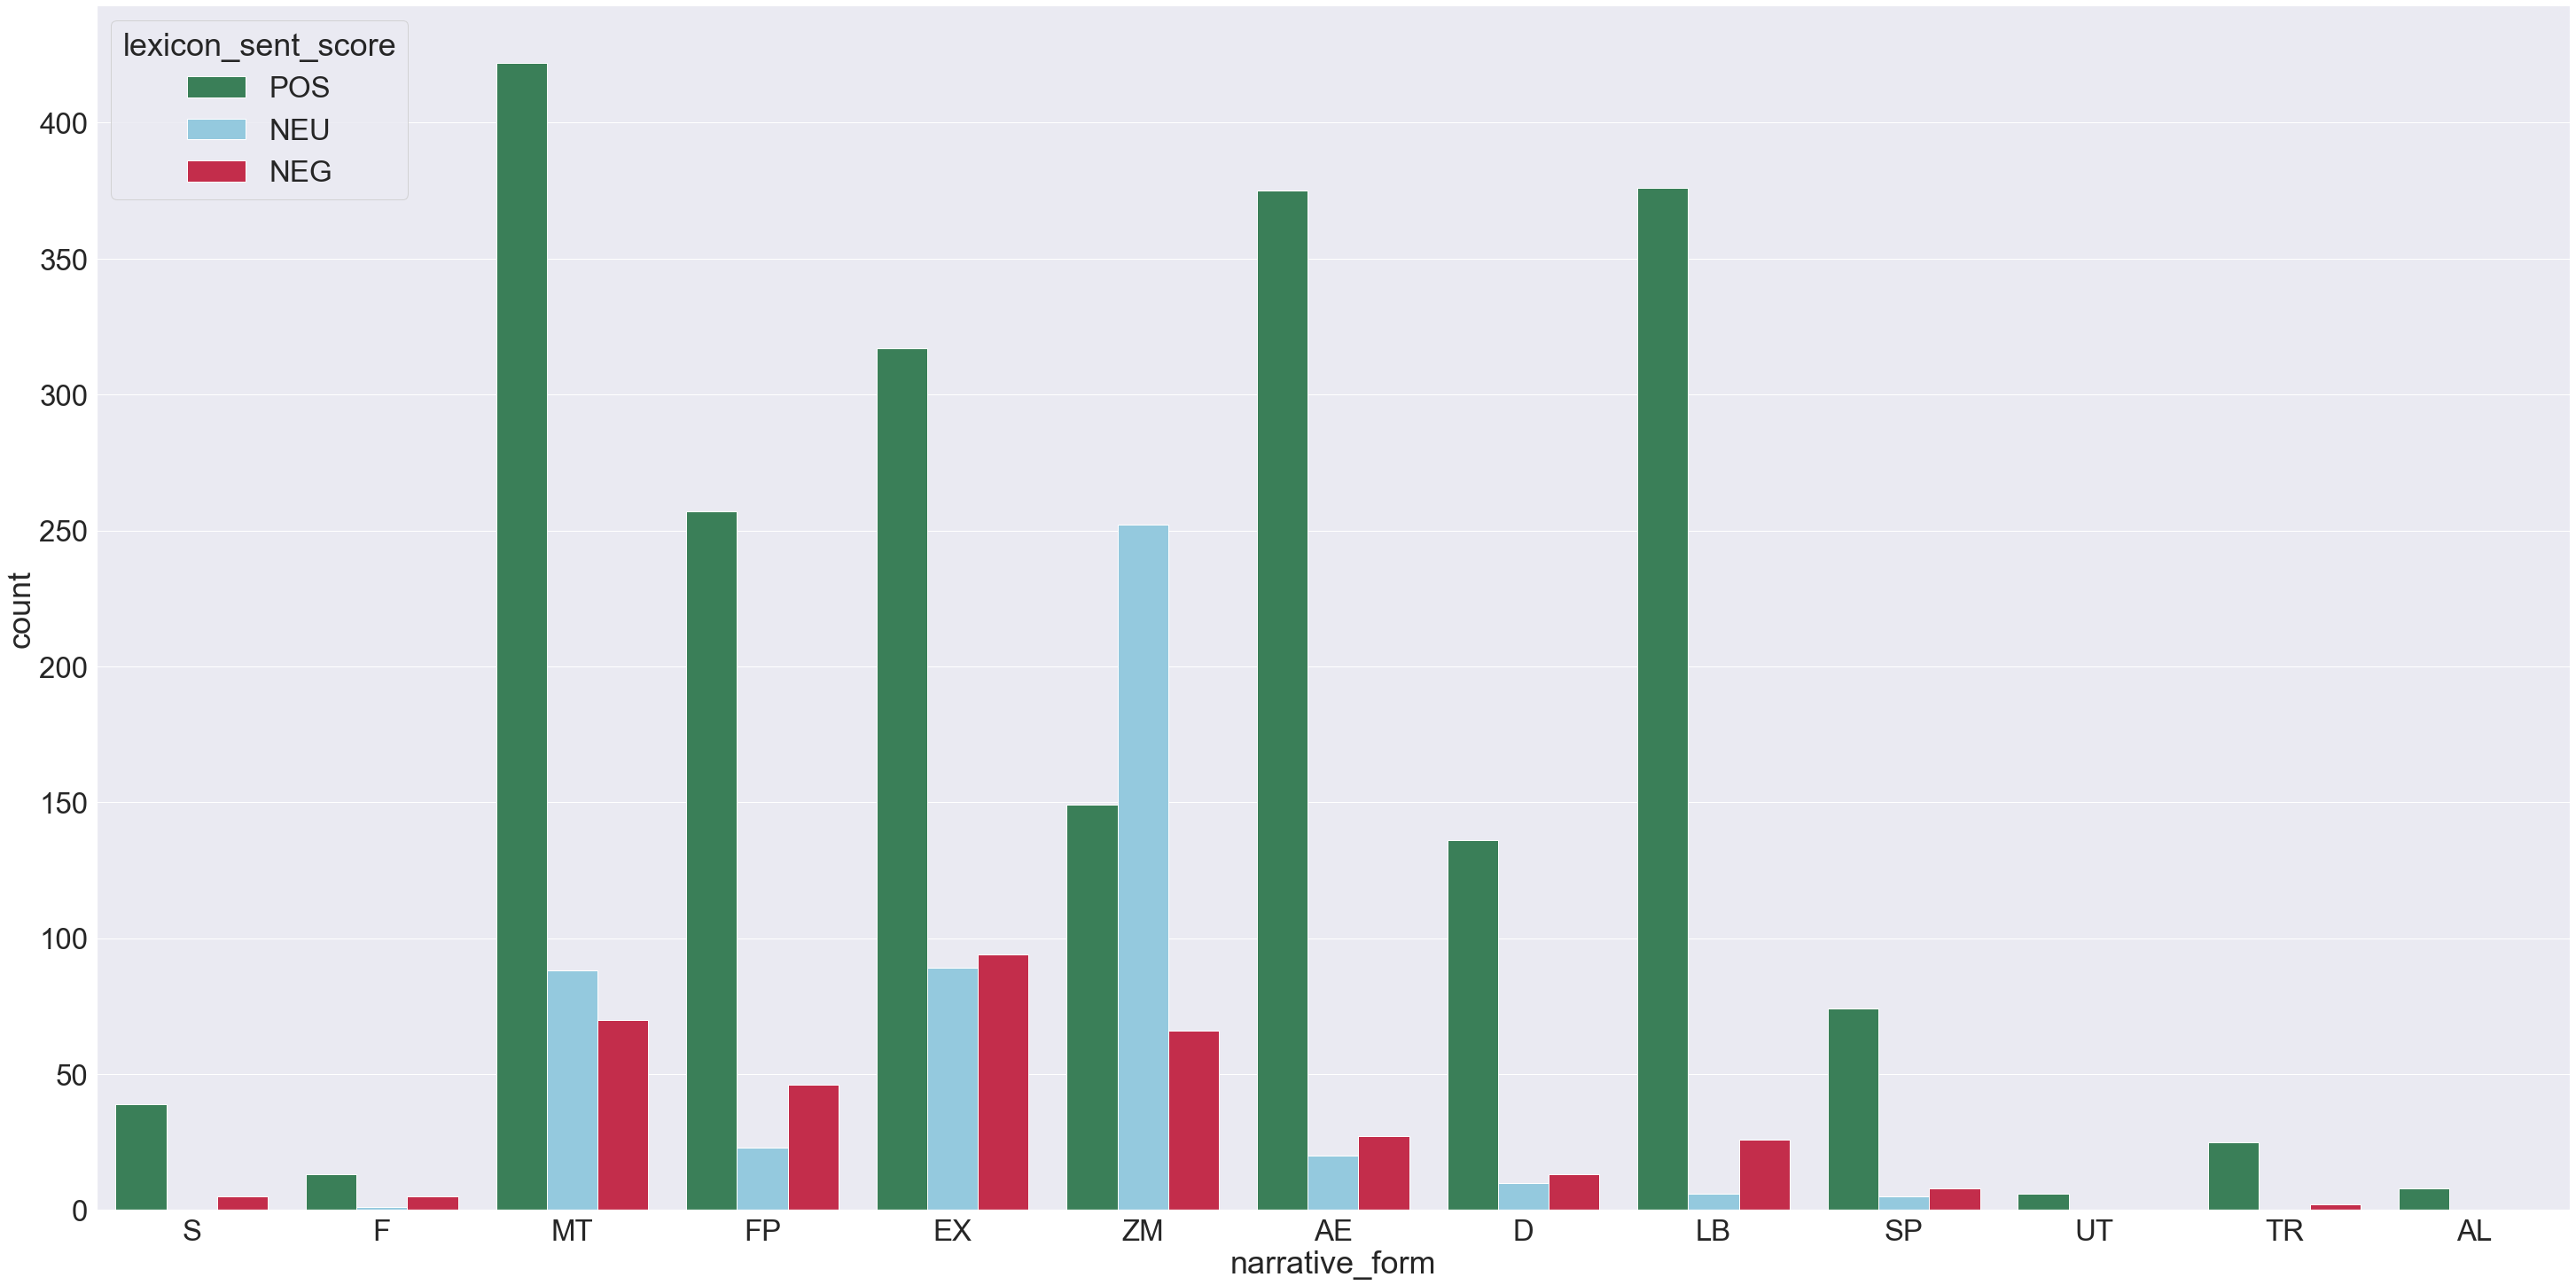

In [69]:
colors = {'POS':'seagreen', 'NEU':'skyblue', 'NEG':'crimson'}
sent_Score2 = sns.countplot(x=df['narrative_form'], palette=colors,hue=df['lexicon_sent_score'])
fig2 = sent_Score2.get_figure()
fig2.savefig("results/plots/spanish/lexicon_sent_score.png")


Computational dictionary

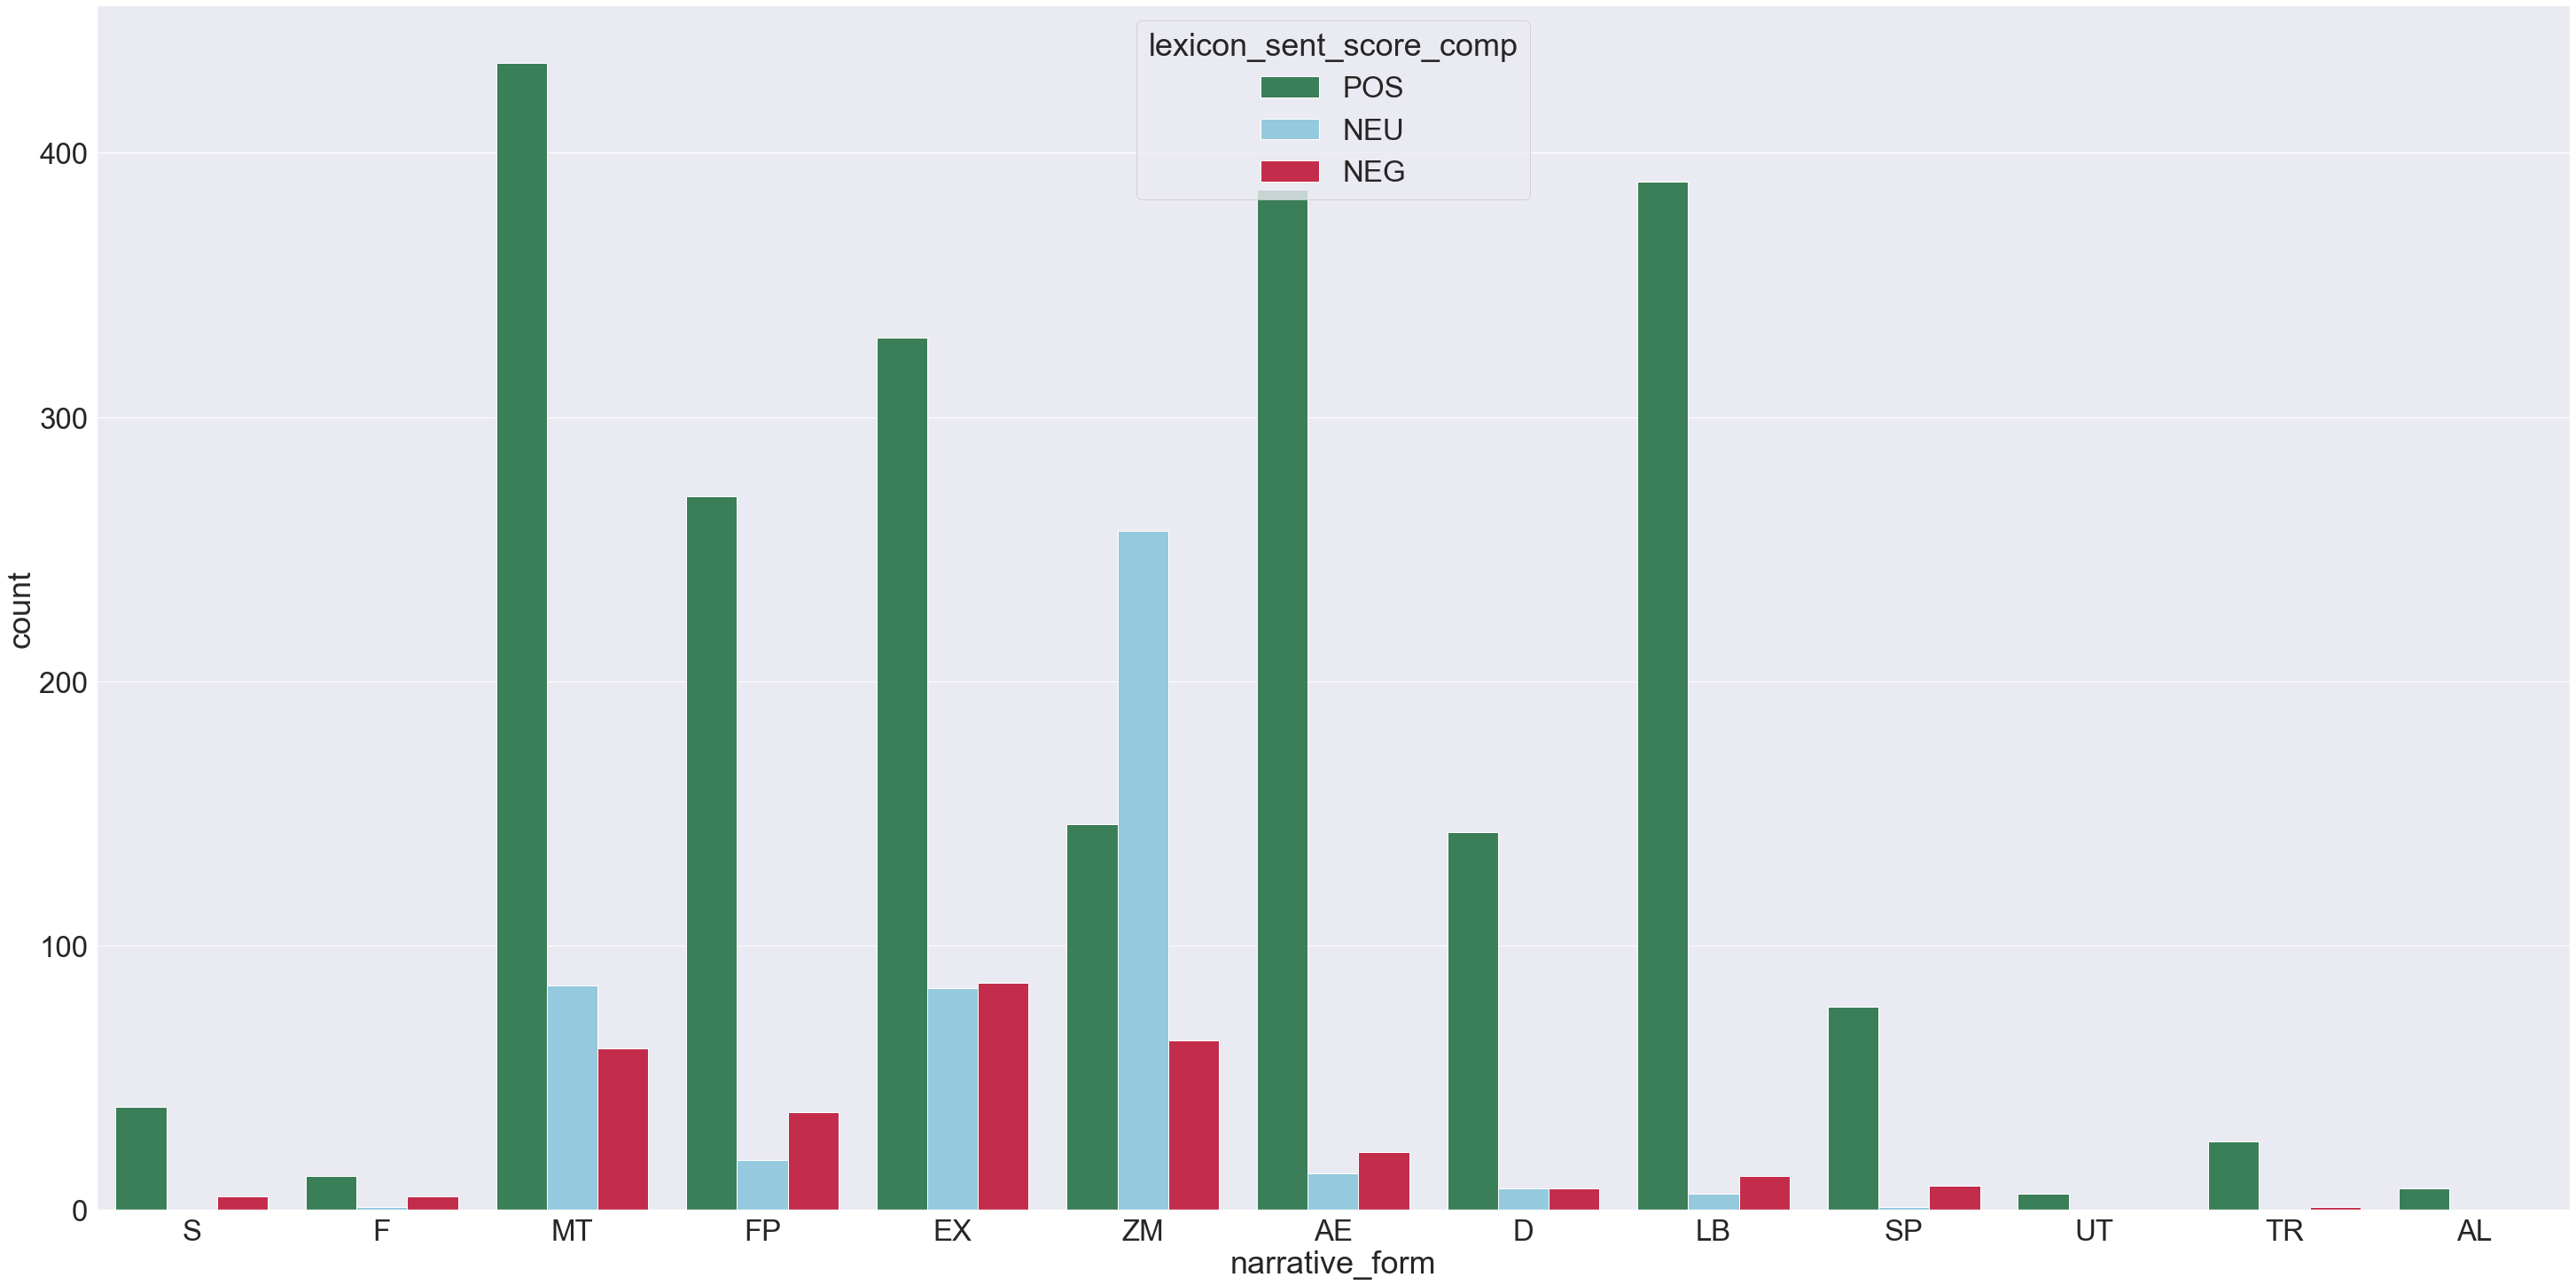

In [70]:
colors = {'POS':'seagreen', 'NEU':'skyblue', 'NEG':'crimson'}
sent_Score3 = sns.countplot(x=df['narrative_form'], palette=colors,hue=df['lexicon_sent_score_comp'])
fig3 = sent_Score3.get_figure()
fig3.savefig("results/plots/spanish/lexicon_sent_score_comp.png")

With the lexicon emotion methood, we see a prevalence of joy words (as there is almost double the number of joy words in the lexicon than the following category which is anger). In narrative forms with a smaller amount of tokens, we hardly find any emotions - dream (sadness, fear), allegory (joy, fear, surprise), satire (anger, sadness, disgust and joy), fables (joy and sadness). 

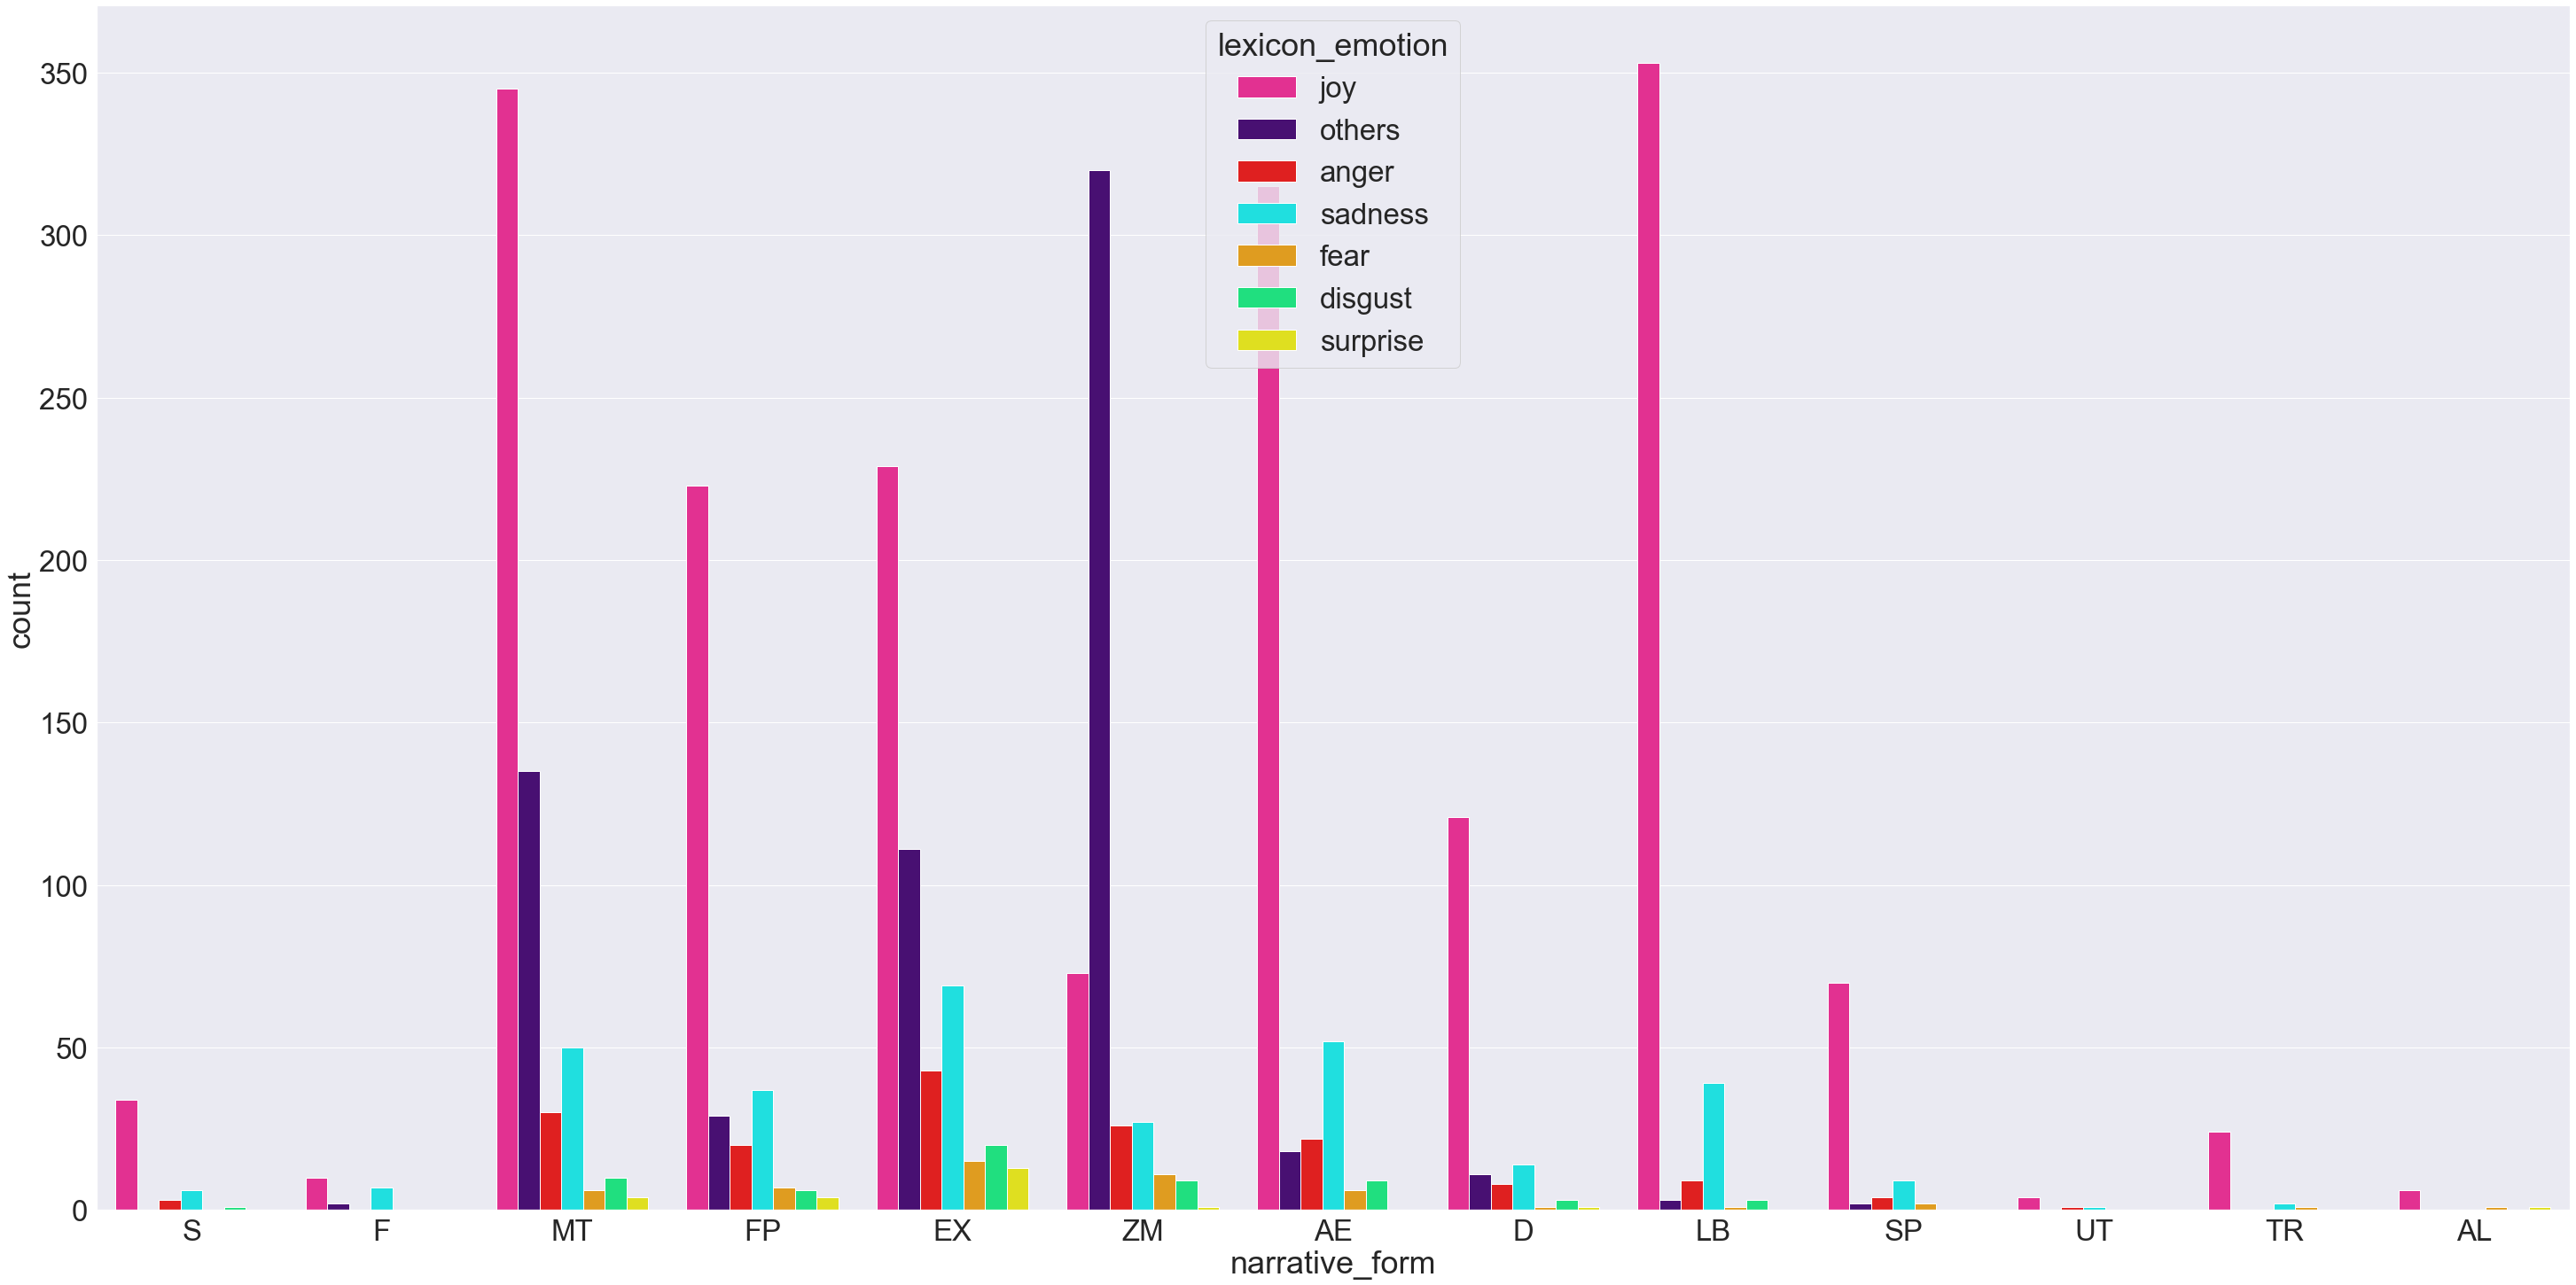

In [71]:
colors = {'joy':'deeppink', 'sadness':'aqua', 'disgust':'springgreen','anger':'red', 'fear':'orange', 'surprise':'yellow', 'others':'indigo'}

lexicon_emotion_score = sns.countplot(x='narrative_form',data=df, palette=colors,hue='lexicon_emotion')
fig = lexicon_emotion_score.get_figure()
fig.savefig("results/plots/spanish/lexicon_emotion_score.png")


Using the ML method (pysentimiento) we can notice a large number of narrative forms classified as neutral, followed by negative and a small amount classified as positive. There weren't any positive fables, satires, allegories and utopias. Half of the satires and fables were negative. 

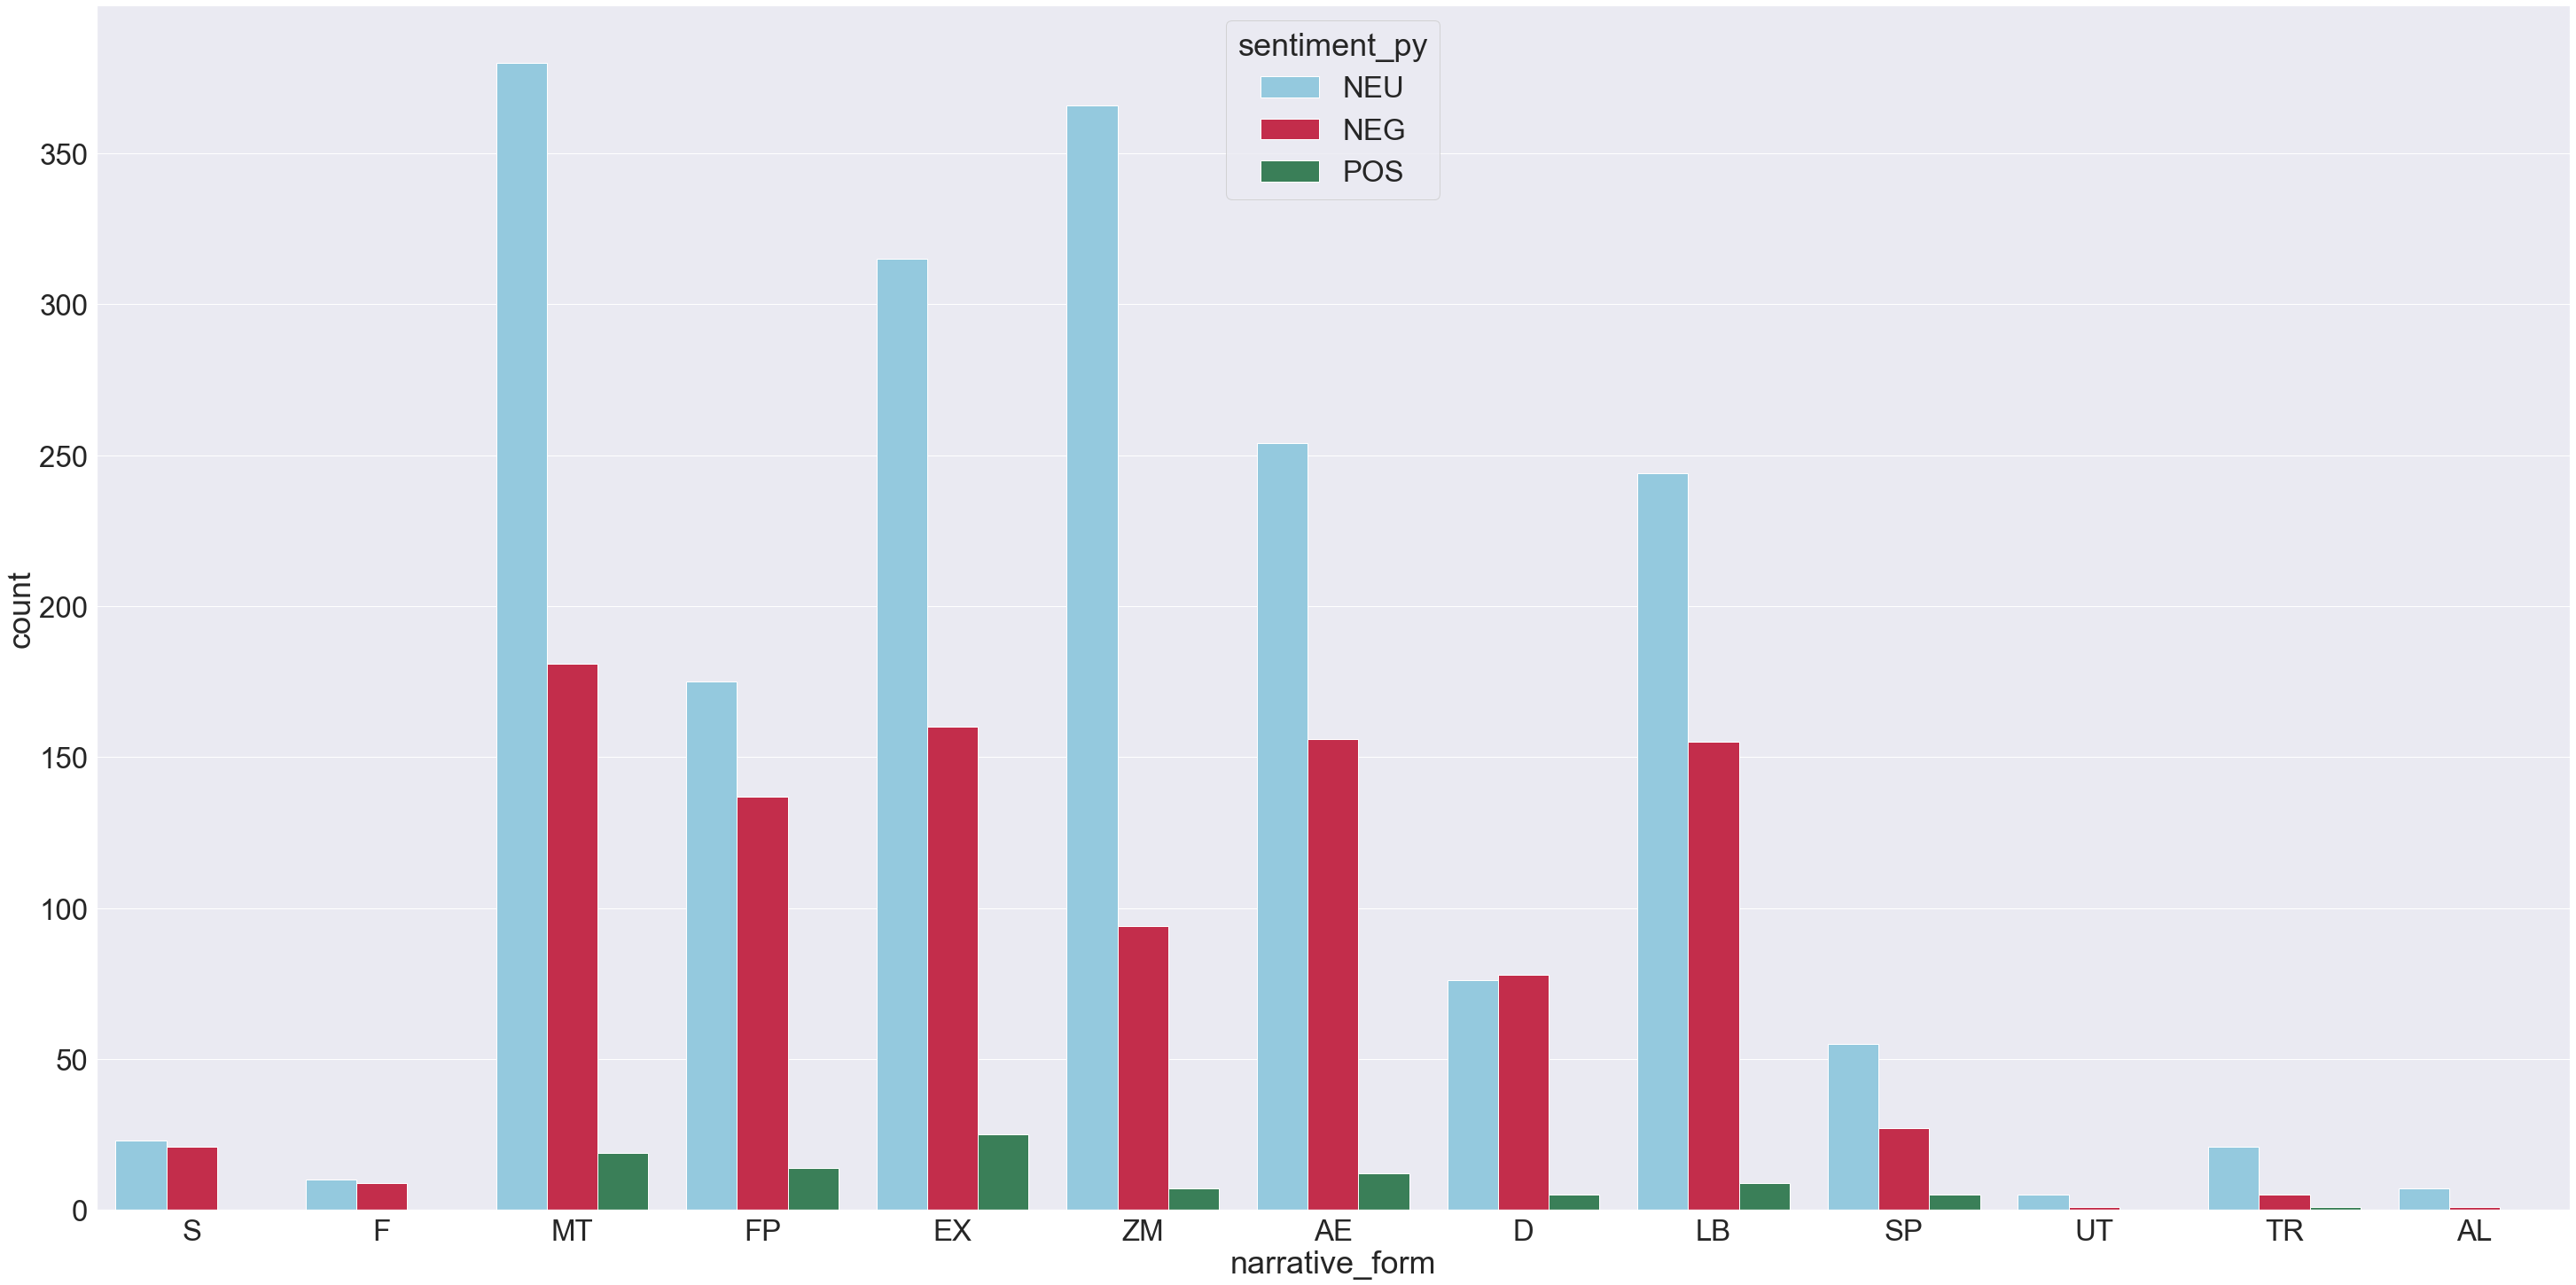

In [72]:
colors = {'POS':'seagreen', 'NEU':'skyblue', 'NEG':'crimson'}
pysentimiento_sentiment = sns.countplot(x=df['narrative_form'], palette=colors,hue=df['sentiment_py'])
fig = pysentimiento_sentiment.get_figure()
fig.savefig("results/plots/spanish/pysentimiento_sentiment.png")


The ML emotion analysis also tends to categorize narrative forms with the 'others' emotion (which means emotion that doesn't belong to our categories). The second prevalent category is anger, present in all narrative forms, except for utopia. Other than that, pysentimiento finds sadness in satire, self-portraits and portraits of the other, examples, dialogues and letters. Joy is represented in all narrative forms except for fables and satire.

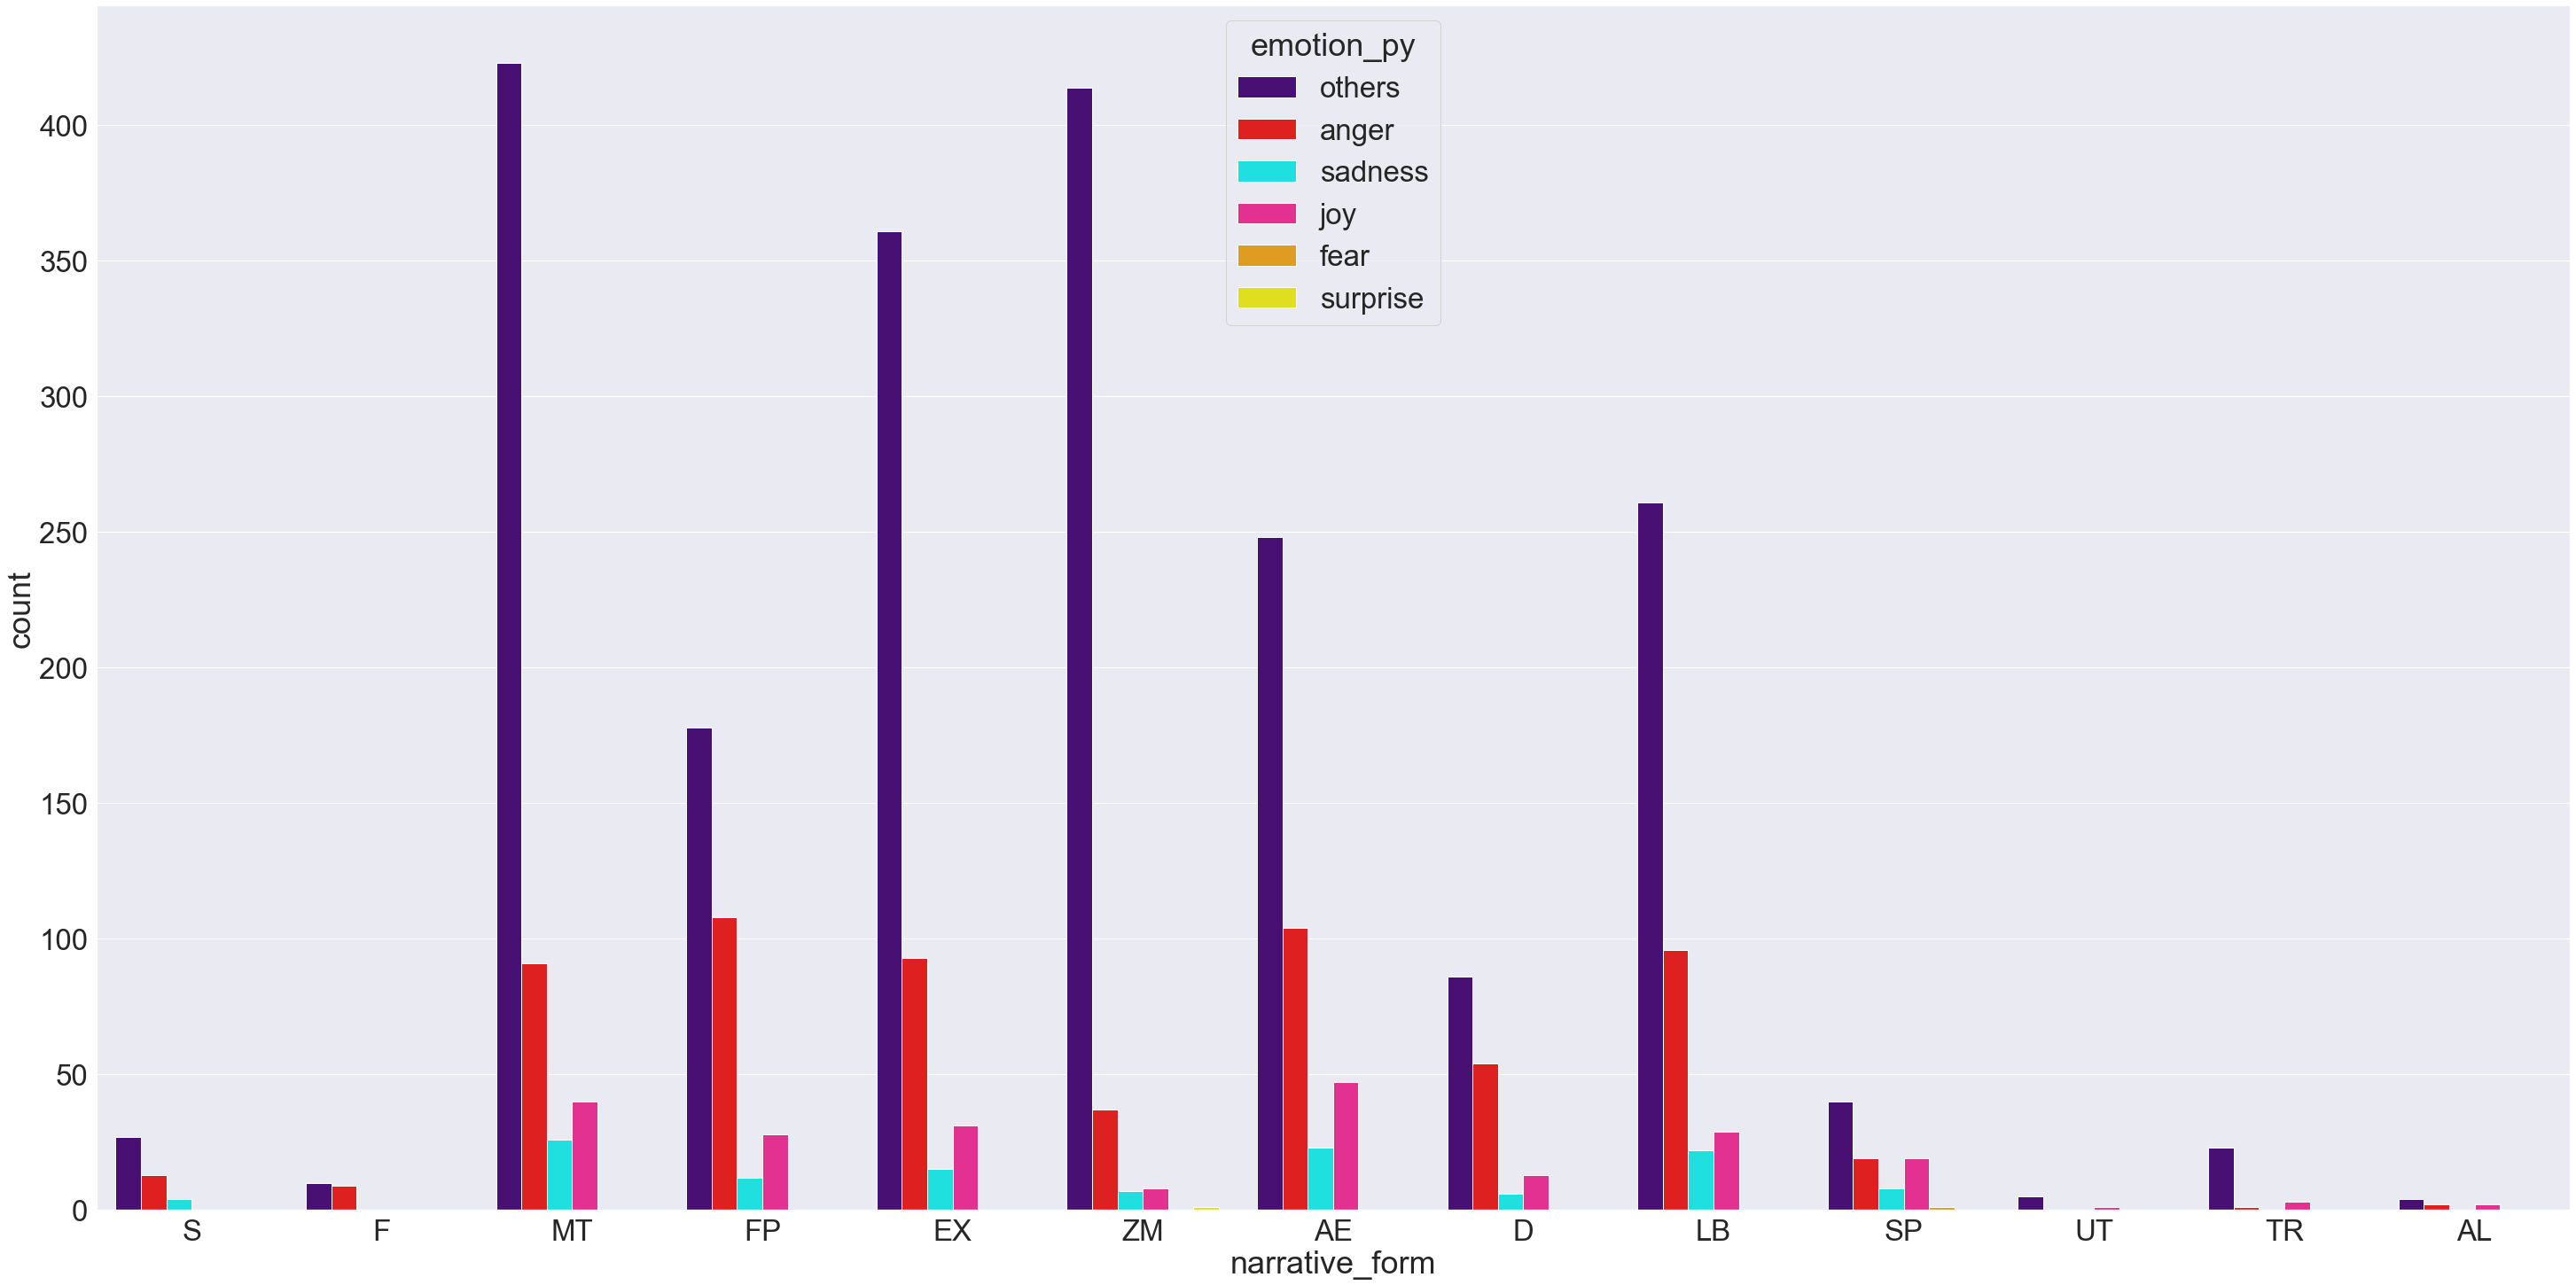

In [73]:
colors = {'joy':'deeppink', 'sadness':'aqua', 'disgust':'springgreen','anger':'red', 'fear':'orange', 'surprise':'yellow', 'others':'indigo'}

lexicon_emotion_score = sns.countplot(x='narrative_form',data=df, palette=colors,hue='emotion_py')
fig = lexicon_emotion_score.get_figure()
fig.savefig("results/plots/spanish/pysentimiento_emotion.png")


In [74]:
df

issue_pid  \
filename                                                                                                                    
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                          o:mws-112-823   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                         o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                         o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                          o:mws-112-841   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt  o:mws-093-235   
...                                                                                                                   ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.11.txt                        o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.3.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.5.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.7.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.9.txt                         o:mws.8083   

                                                                                                           narrative_form  \
filename                                                                                                                    
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                                      S   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                                     F   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                                    MT   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                                     FP   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt             EX   
...                                                                                                                   ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.11.txt                                FP   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.3.txt                                 AE   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.5.txt                                 TR   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.7.txt                                 FP   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.9.txt                                 FP   

                                                                                                            xmlid  \
filename                                                                                                            
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                           FR.3   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                         FR.12   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                         FR.13   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                           FR.4   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt  FR.10   
...                                      

In [75]:
df.to_xml('sentiment_emotion_narrativeForms.xml')

In [76]:
df

issue_pid  \
filename                                                                                                                    
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                          o:mws-112-823   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                         o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                         o:mws-112-841   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                          o:mws-112-841   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt  o:mws-093-235   
...                                                                                                                   ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.11.txt                        o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.3.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.5.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.7.txt                         o:mws.8083   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.9.txt                         o:mws.8083   

                                                                                                           narrative_form  \
filename                                                                                                                    
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                                      S   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                                     F   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                                    MT   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                                     FP   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt             EX   
...                                                                                                                   ...   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.11.txt                                FP   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.3.txt                                 AE   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.5.txt                                 TR   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.7.txt                                 FP   
1812_El-Pensador-Mexicano_José-Joaquín-Fernández-de-Lizardi_Vol-1_Nr-011_8083_FR.9.txt                                 FP   

                                                                                                            xmlid  \
filename                                                                                                            
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-004_112-823_FR.3.txt                           FR.3   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.12.txt                         FR.12   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.13.txt                         FR.13   
1735-1736_El-Duende-Crítico_Frai-Manuel-de-San-Josef_Vol-1_Nr-010_112-841_FR.4.txt                           FR.4   
1761-06-09_El-Duende-especulativo-sobre-la-vida-civil_Juan-Antonio-Mercadal-_Vol-1_Nr-01_093-235_FR.10.txt  FR.10   
...                                      